<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 180px;margin-top:50px;margin-bottom:50px;" align="left">
   <div style= "font-size: 28px;font-weight:bold;margin-top:20px;margin-bottom:20px;margin-left:360px;margin-right:140px; line-height: 1.1;color:#6f800f;"><center>Data Mining Project | ABCDEats Inc.</center></div>
   <div style= "font-size: 17px;font-weight:bold;"><center>Fall Semester | 2024 - 2025</center></div>
   <div><center><b>Master in Data Science and Advanced Analytics</b> </center></div>
 <br>
    <div><center>André Silvestre, 20240502 </center></div>
    <div><center>Filipa Pereira, 20240509 </center></div>
    <div><center>Umeima Mahomed, 20240543 </center></div>
    <br>
    <div><center><b>Group 37</b></center></div>
 <br>

<div style="background: linear-gradient(to right,#6f800f, #6f800f); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## Introduction

The purpose of this project is to analyze the data of **ABCDEats Inc.**, ....


## Data Description

Each row corresponds to one customer, and the column descriptions are given below:

|                                   Column Name                                   | Description                                                                                         |
|:-------------------------------------------------------------------------------:|:----------------------------------------------------------------------------------------------------|
|                                **`customer_id`**                                | Unique identifier for each customer.                                                                |
|                              **`customer_region`**                              | Geographic region where the customer is located.                                                    |
|                               **`customer_age`**                                | Age of the customer.                                                                                |
|                               **`vendor_count`**                                | Number of unique vendors the customer has ordered from.                                             |
|                               **`product_count`**                               | Total number of products the customer has ordered.                                                  |
|                                 **`is_chain`**                                  | Indicates whether the customer’s order was from a chain restaurant.                                 |
|                                **`first_order`**                                | Number of days from the start of the dataset when the customer first placed an order.               |
|                                **`last_order`**                                 | Number of days from the start of the dataset when the customer most recently placed an order.       |
|                                **`last_promo`**                                 | The category of the promotion or discount most recently used by the customer.                       |
|                              **`payment_method`**                               | Method most recently used by the customer to pay for their orders.                                  |
| **`CUI_American`**, **`CUI_Asian`**, **`CUI_Chinese`**, **`CUI_Italian`**, etc. | The amount in monetary units spent by the customer from the indicated type of cuisine.              |
|                           **`DOW_0`** to **`DOW_6`**                            | Number of orders placed on each day of the week (**`0`** = **Sunday**, **`6`** = **Saturday**).     |
|                            **`HR_0`** to **`HR_23`**                            | Number of orders placed during each hour of the day (**`0`** = **midnight**, **`23`** = **11 PM**). |

<div style="background: linear-gradient(to right,#6f800f, #6f800f); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## 📚 Libraries Import

In [2]:
# For data
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# For data preprocessing
from sklearn.model_selection import train_test_split

# For model evaluation

# For clustering


# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

# <a class='anchor' id='1'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#bEd62f, #6f800f); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>Part 1 | Exploratory Data Analysis</b></h1></center>
</div>

In [3]:
# Importing the dataset
ABCDEats = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

In [4]:
# Display the first 5 rows
ABCDEats.head() 

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Number of rows and columns
print('Number of\033[1m rows \033[0m:', ABCDEats.shape[0])
print('Number of\033[1m columns \033[0m:', ABCDEats.shape[1])

Number of rows : 31888
Number of columns : 56


In [6]:
# Check for missing values in the dataset (n = number of missing values & % = percentage of missing values)
pd.DataFrame({'n NAs': ABCDEats.isnull().sum(), 
              '% NAs': round(ABCDEats.isnull().mean() * 100,2)})

,n NAs,% NAs
customer_id,0,0.00
customer_region,0,0.00
customer_age,727,2.28
vendor_count,0,0.00
product_count,0,0.00
is_chain,0,0.00
first_order,106,0.33
last_order,0,0.00
last_promo,0,0.00
payment_method,0,0.00


<Axes: >

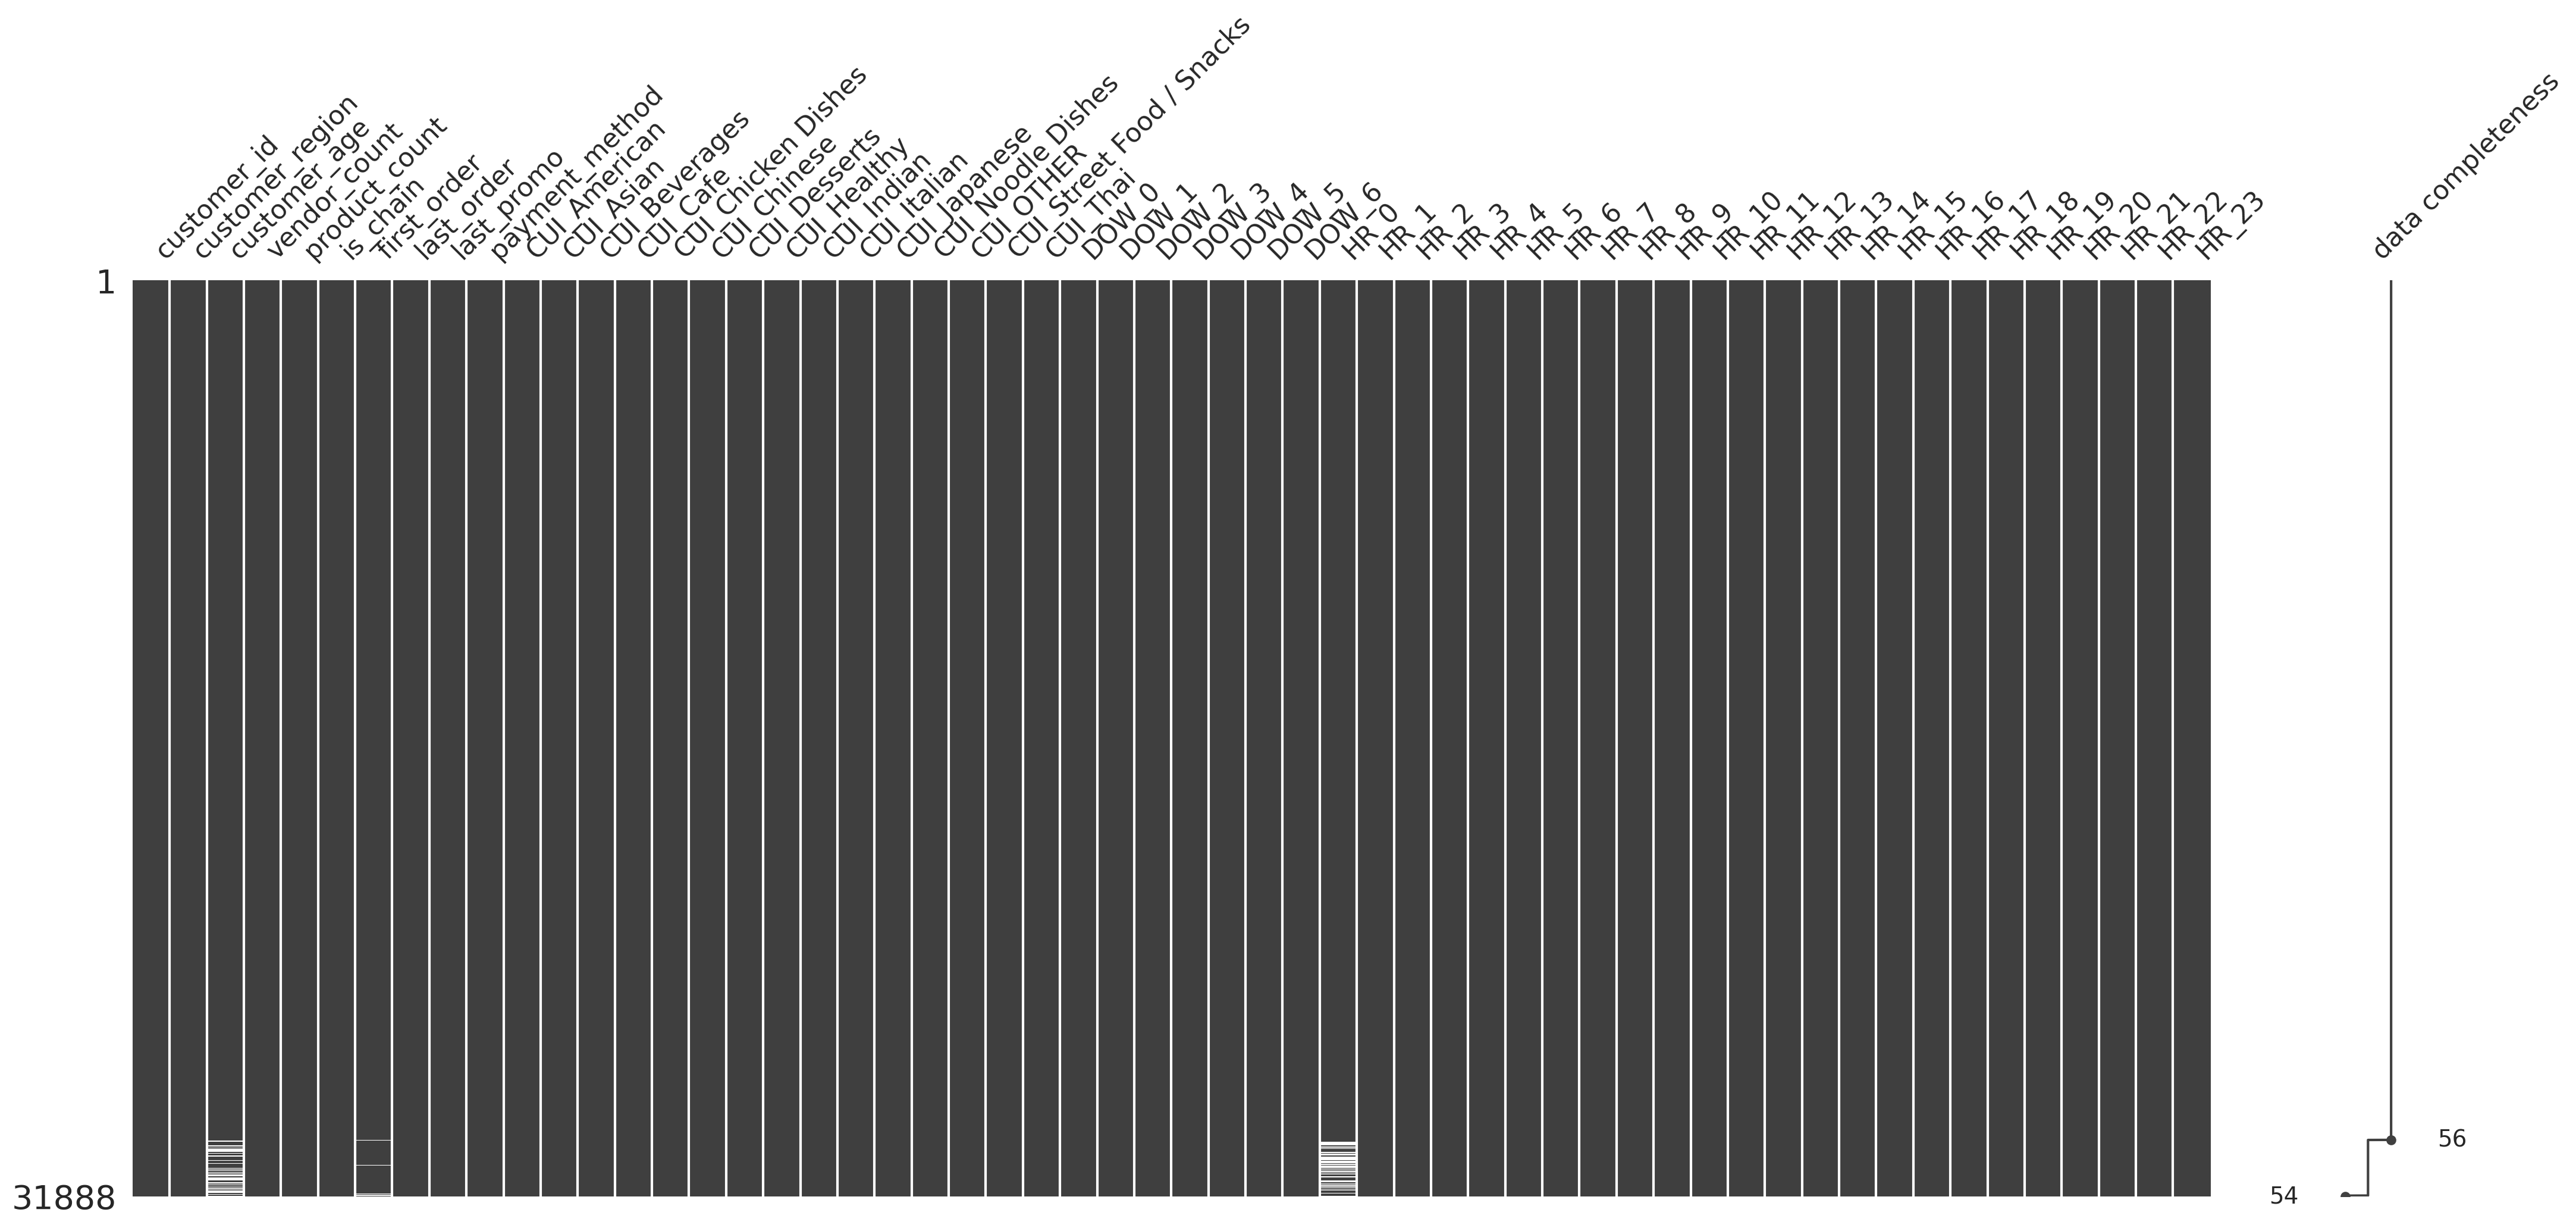

In [7]:
import missingno as msno
msno.matrix(ABCDEats, labels=True, sort="descending")

In [8]:
sns.pairplot(ABCDEats[:1], height=1.5)

KeyboardInterrupt: 

In [6]:
# Check for duplicates rows by costumer_id
ABCDEats.duplicated().sum()
# ABCDEats.duplicated('customer_id').sum() # it is the same

np.int64(13)

In [7]:
# Drop duplicates
ABCDEats.drop_duplicates(inplace=True)

---

In [8]:
# Check the data types
ABCDEats.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

In [9]:
# Descriptive statistics
round(ABCDEats.describe(), 2)

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31148.00,31875.00,31875.00,31875.00,31769.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,30711.0,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00
mean,27.51,3.10,5.67,2.82,28.47,63.67,4.88,9.96,2.30,0.80,0.77,1.43,0.88,0.95,1.63,3.23,3.00,0.71,3.00,3.91,0.84,0.56,0.57,0.59,0.62,0.68,0.65,0.70,0.0,0.05,0.06,0.12,0.10,0.08,0.07,0.08,0.13,0.23,0.33,0.38,0.31,0.24,0.22,0.28,0.36,0.39,0.34,0.25,0.14,0.07,0.05,0.05
std,7.16,2.77,6.96,3.98,24.10,23.23,11.65,23.56,8.48,6.43,3.66,8.19,5.26,5.83,7.44,11.25,10.18,4.54,9.77,15.55,4.43,1.01,1.04,1.05,1.07,1.09,1.07,1.17,0.0,0.32,0.35,0.50,0.44,0.36,0.33,0.38,0.64,0.73,0.89,0.96,0.84,0.64,0.60,0.74,0.87,0.94,0.89,0.80,0.59,0.35,0.30,0.28
min,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,1.00,2.00,1.00,7.00,49.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,26.00,2.00,3.00,2.00,22.00,70.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,31.00,4.00,7.00,3.00,45.00,83.00,5.66,11.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,80.00,41.00,269.00,83.00,90.00,90.00,280.21,896.71,229.22,326.10,219.66,739.73,230.07,255.81,309.07,468.33,706.14,275.11,366.08,454.45,136.38,16.00,17.00,15.00,17.00,16.00,20.00,20.00,0.0,14.00,12.00,11.00,14.00,7.00,8.00,15.00,52.00,23.00,25.00,36.00,26.00,14.00,13.00,23.00,22.00,20.00,24.00,35.00,36.00,11.00,15.00,13.00


In [10]:
round(ABCDEats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
customer_age,31148.0,27.51,7.16,15.0,23.0,26.0,31.00,80.00
vendor_count,31875.0,3.10,2.77,0.0,1.0,2.0,4.00,41.00
product_count,31875.0,5.67,6.96,0.0,2.0,3.0,7.00,269.00
is_chain,31875.0,2.82,3.98,0.0,1.0,2.0,3.00,83.00
first_order,31769.0,28.47,24.10,0.0,7.0,22.0,45.00,90.00
last_order,31875.0,63.67,23.23,0.0,49.0,70.0,83.00,90.00
CUI_American,31875.0,4.88,11.65,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31875.0,9.96,23.56,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31875.0,2.30,8.48,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31875.0,0.80,6.43,0.0,0.0,0.0,0.00,326.10


In [11]:
round(ABCDEats.describe(include="all").T, 2) #### será interessante manter?, a prof fez assim, also gosto mais desta forma de se ler


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,31875,31875,fd40d3b0e0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_region,31875,9,8670,9761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_age,31148.0,NaN,NaN,NaN,27.507545,7.161828,15.0,23.0,26.0,31.0,80.0
vendor_count,31875.0,NaN,NaN,NaN,3.102714,2.771753,0.0,1.0,2.0,4.0,41.0
product_count,31875.0,NaN,NaN,NaN,5.668424,6.957933,0.0,2.0,3.0,7.0,269.0
is_chain,31875.0,NaN,NaN,NaN,2.819357,3.977977,0.0,1.0,2.0,3.0,83.0
first_order,31769.0,NaN,NaN,NaN,28.469924,24.104626,0.0,7.0,22.0,45.0,90.0
last_order,31875.0,NaN,NaN,NaN,63.672376,23.227992,0.0,49.0,70.0,83.0,90.0
last_promo,31875,4,-,16744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,31875,3,CARD,20153,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Check the unique values of each column
for col in ABCDEats.columns[1:]:
    print(f'\033[1m{col}\033[0m[{ABCDEats[col].nunique()}]: {sorted(ABCDEats[col].unique())} \n')

customer_region[9]: ['-', '2360', '2440', '2490', '4140', '4660', '8370', '8550', '8670'] 

customer_age[66]: [np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(28.0), np.float64(29.0), np.float64(30.0), np.float64(31.0), np.float64(33.0), np.float64(38.0), np.float64(nan), np.float64(27.0), np.float64(32.0), np.float64(34.0), np.float64(35.0), np.float64(36.0), np.float64(37.0), np.float64(39.0), np.float64(40.0), np.float64(41.0), np.float64(42.0), np.float64(43.0), np.float64(44.0), np.float64(45.0), np.float64(46.0), np.float64(47.0), np.float64(48.0), np.float64(49.0), np.float64(50.0), np.float64(51.0), np.float64(52.0), np.float64(53.0), np.float64(54.0), np.float64(55.0), np.float64(56.0), np.float64(57.0), np.float64(58.0), np.float64(59.0), np.float64(60.0), np.float64(61.0), np.float64(62.0), np.float

In [13]:
# With the unique values of each column, we can see that there are some columns with values represented by '-' 
# and some columns with values that are not in the domain of the column.

# Let's check the columns with values represented by '-' in the columns 'customer_region' and 'last_promo'
print(len(ABCDEats[ABCDEats['customer_region'] == '-'])) 
print(len(ABCDEats[ABCDEats['last_promo'] == '-'])) # last_promo '-' can be considered as don't have a promo

442
16744


In [14]:
# Check if first_order is before last_order
(ABCDEats['first_order'] > ABCDEats['last_order']).sum() # No rows with first_order > last_order 

np.int64(0)

---

## 📊 Data Visualization

#### `customer_region`

In [15]:
# Unique values of the column `customer_region`
print(ABCDEats['customer_region'].unique())

['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']


In [16]:
# Absolute and Relative Frequency Table of the column `customer_region`
customer_region_n_freq = ABCDEats['customer_region'].value_counts().reset_index()
customer_region_n_freq.columns = ['customer_region', 'n']
customer_region_n_freq['%'] = round(customer_region_n_freq['n'] / ABCDEats.shape[0] * 100, 2)
customer_region_n_freq.set_index('customer_region', inplace=True)
pd.DataFrame(customer_region_n_freq.sort_values(by='n', ascending=False))

,n,%
customer_region,,
8670,9761,30.62
4660,9550,29.96
2360,8829,27.70
2440,1483,4.65
4140,857,2.69
8370,495,1.55
2490,445,1.40
-,442,1.39
8550,13,0.04


> The column `customer_region` has a value represented by `-` which is a missing value. We can replace that value with some technique like imputation or treat it as a 'NaN' value.

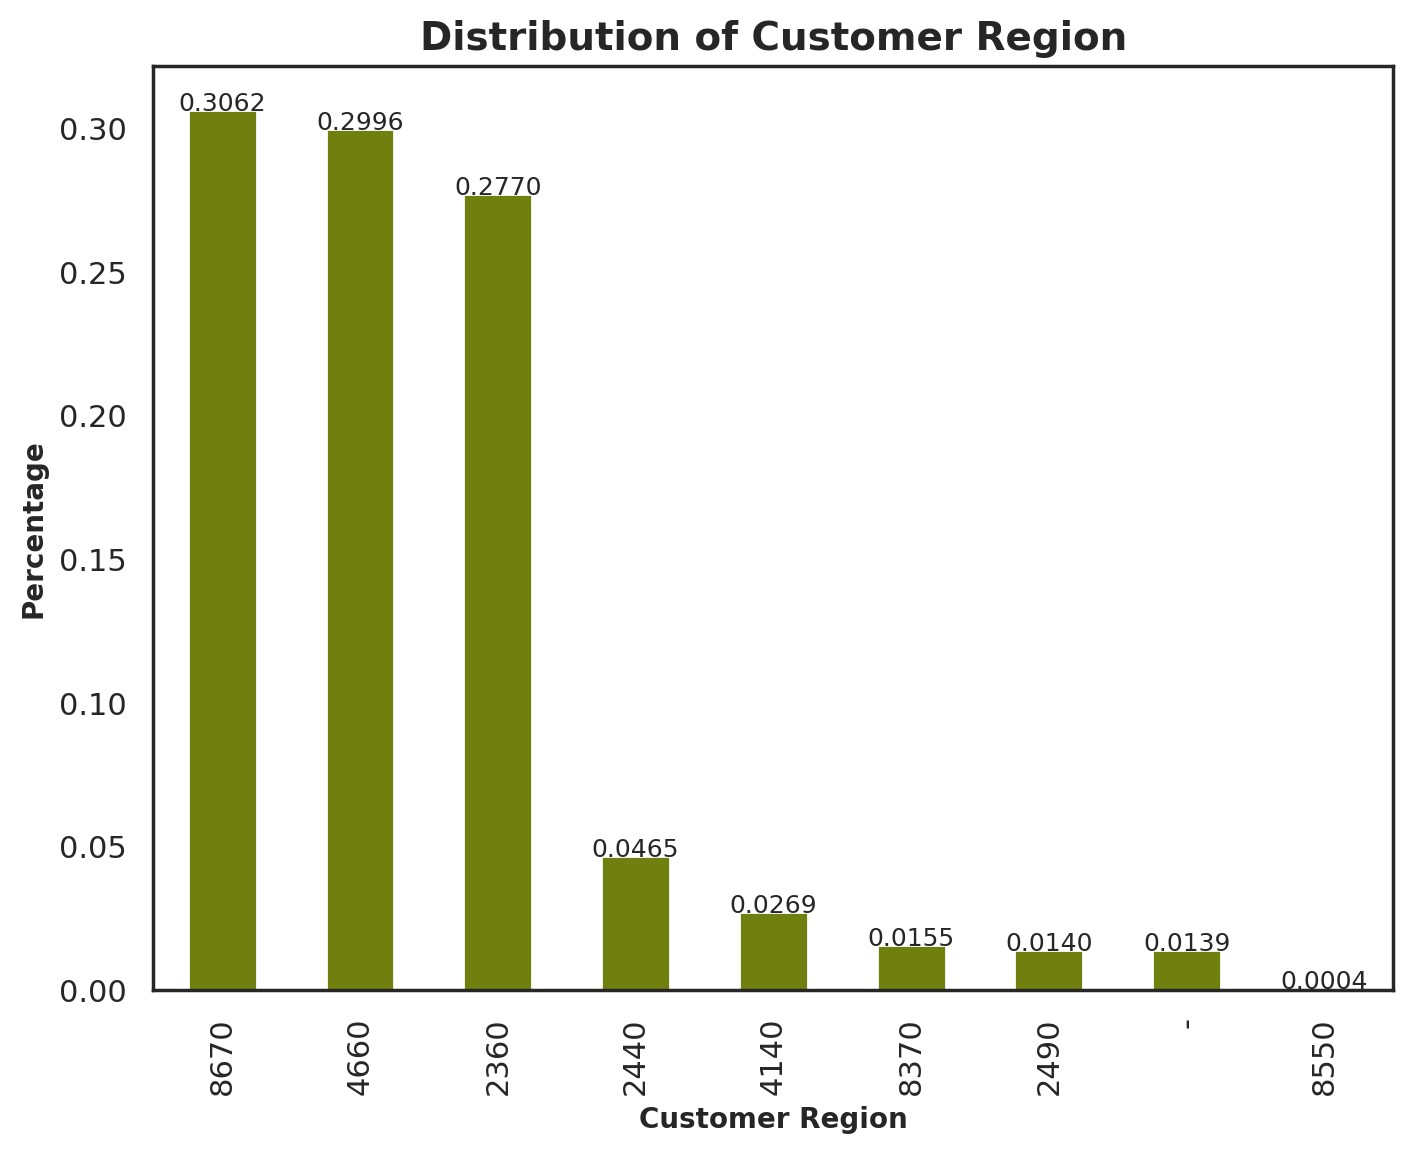

In [17]:
# plot representing the distribution of the customer region
ABCDEats['customer_region'].value_counts(normalize=True).plot(kind='bar', color='#6f800f', figsize=(8, 6))

plt.title('Distribution of Customer Region', fontsize=14, fontweight='bold')
plt.xlabel('Customer Region', fontsize=10, fontweight='bold')
plt.ylabel('Percentage', fontsize=10, fontweight='bold')

for i in range(len(ABCDEats['customer_region'].value_counts(normalize=True))):
    value = ABCDEats['customer_region'].value_counts(normalize=True).iloc[i]
    plt.text(i, value, f'{value:.4f}', ha='center', fontsize=9)  

plt.show()

## MAYBE POR AS MENOS FREQUENTES NUMA CLASSE DE "OUTRAS REG."


#### `customer_age`

In [84]:
x = ABCDEats['customer_age'].value_counts()/(len(ABCDEats))

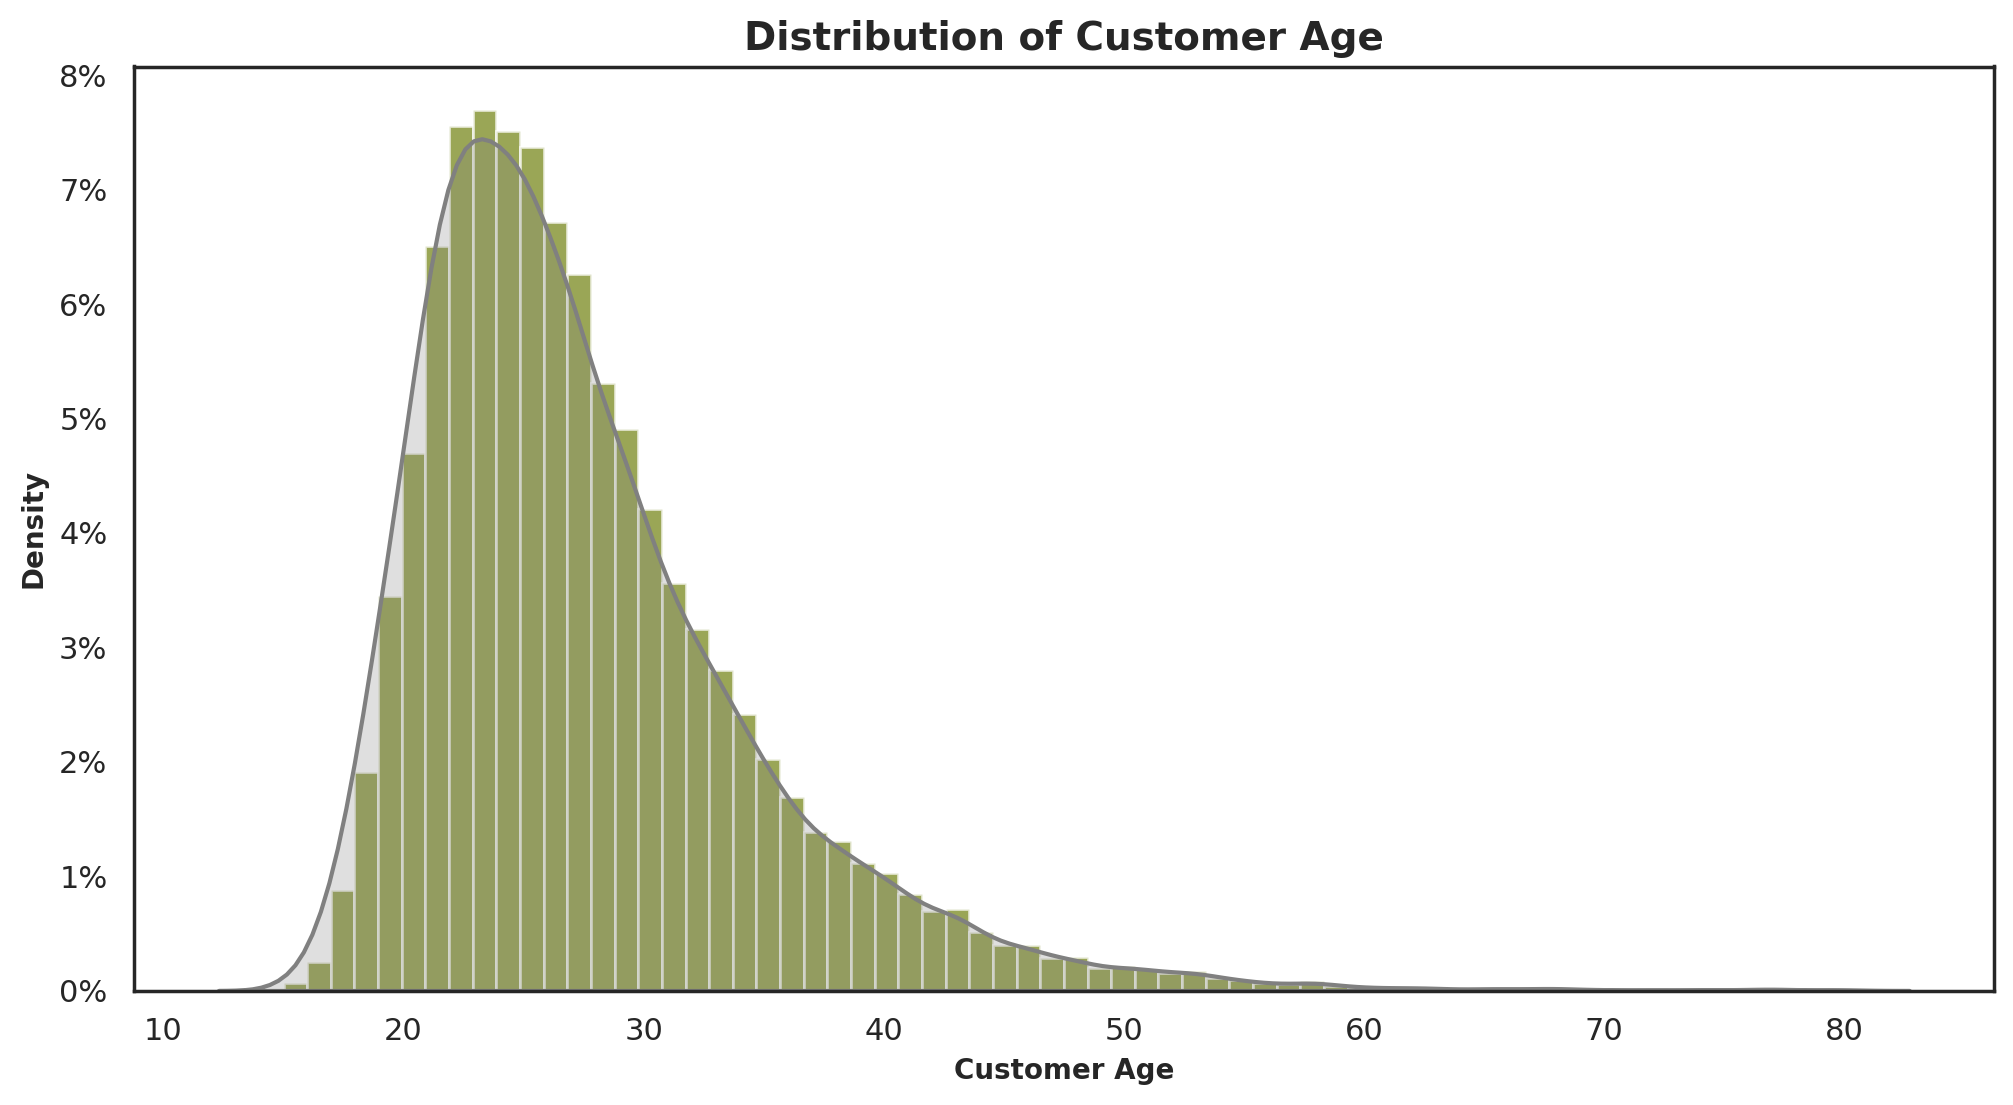

In [94]:
plt.figure(figsize=(12, 6))

plt.hist(ABCDEats['customer_age'], bins=len(x), color='#6f800f', alpha=0.7, density=True)

# Overlay the histogram plot using seaborn for a density plot
sns.kdeplot(ABCDEats['customer_age'], color='grey', lw=1.5, fill="lightgrey" )

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.title('Distribution of Customer Age', fontsize=14, fontweight='bold')
plt.xlabel('Customer Age', fontsize=10, fontweight='bold')
plt.ylabel('Density', fontsize=10, fontweight='bold')
# plt.ylim(0,0.1)

plt.show()


AGRUPAMENTOS:

- 14 - 17 - CHILDREN
- 18 - 23 - UNI
- 24 - 50 - WORKING MAIS 
- 51 - 64 - WORKING MAS MAIS VELHOS
- 65 - 85 - REFORMED??

We can observe that the most common clients tend to be in their 20s to 30s. This may be attributed to higher digital literacy levels in this age group, as well as the possibility that these individuals are at the beginning of their professional lives. As a result, they might experience a more stressful lifestyle, leaving them with less time to cook at home.

VER ESTUDOS QUE POSSAM FZR BACKUP DESTA INFO:
- https://www.supermarketnews.com/grocery-operations/study-why-consumers-select-takeout  isto tem mais a ver do US 
- não podemos analisar se tem alguma coisa a ver com a quarentena porque n temos datas
- https://www.statista.com/outlook/emo/online-food-delivery/worldwide#analyst-opinion

#### `vendor_count`

In [20]:
print(sorted(map(int,ABCDEats['vendor_count'].unique())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 40, 41]


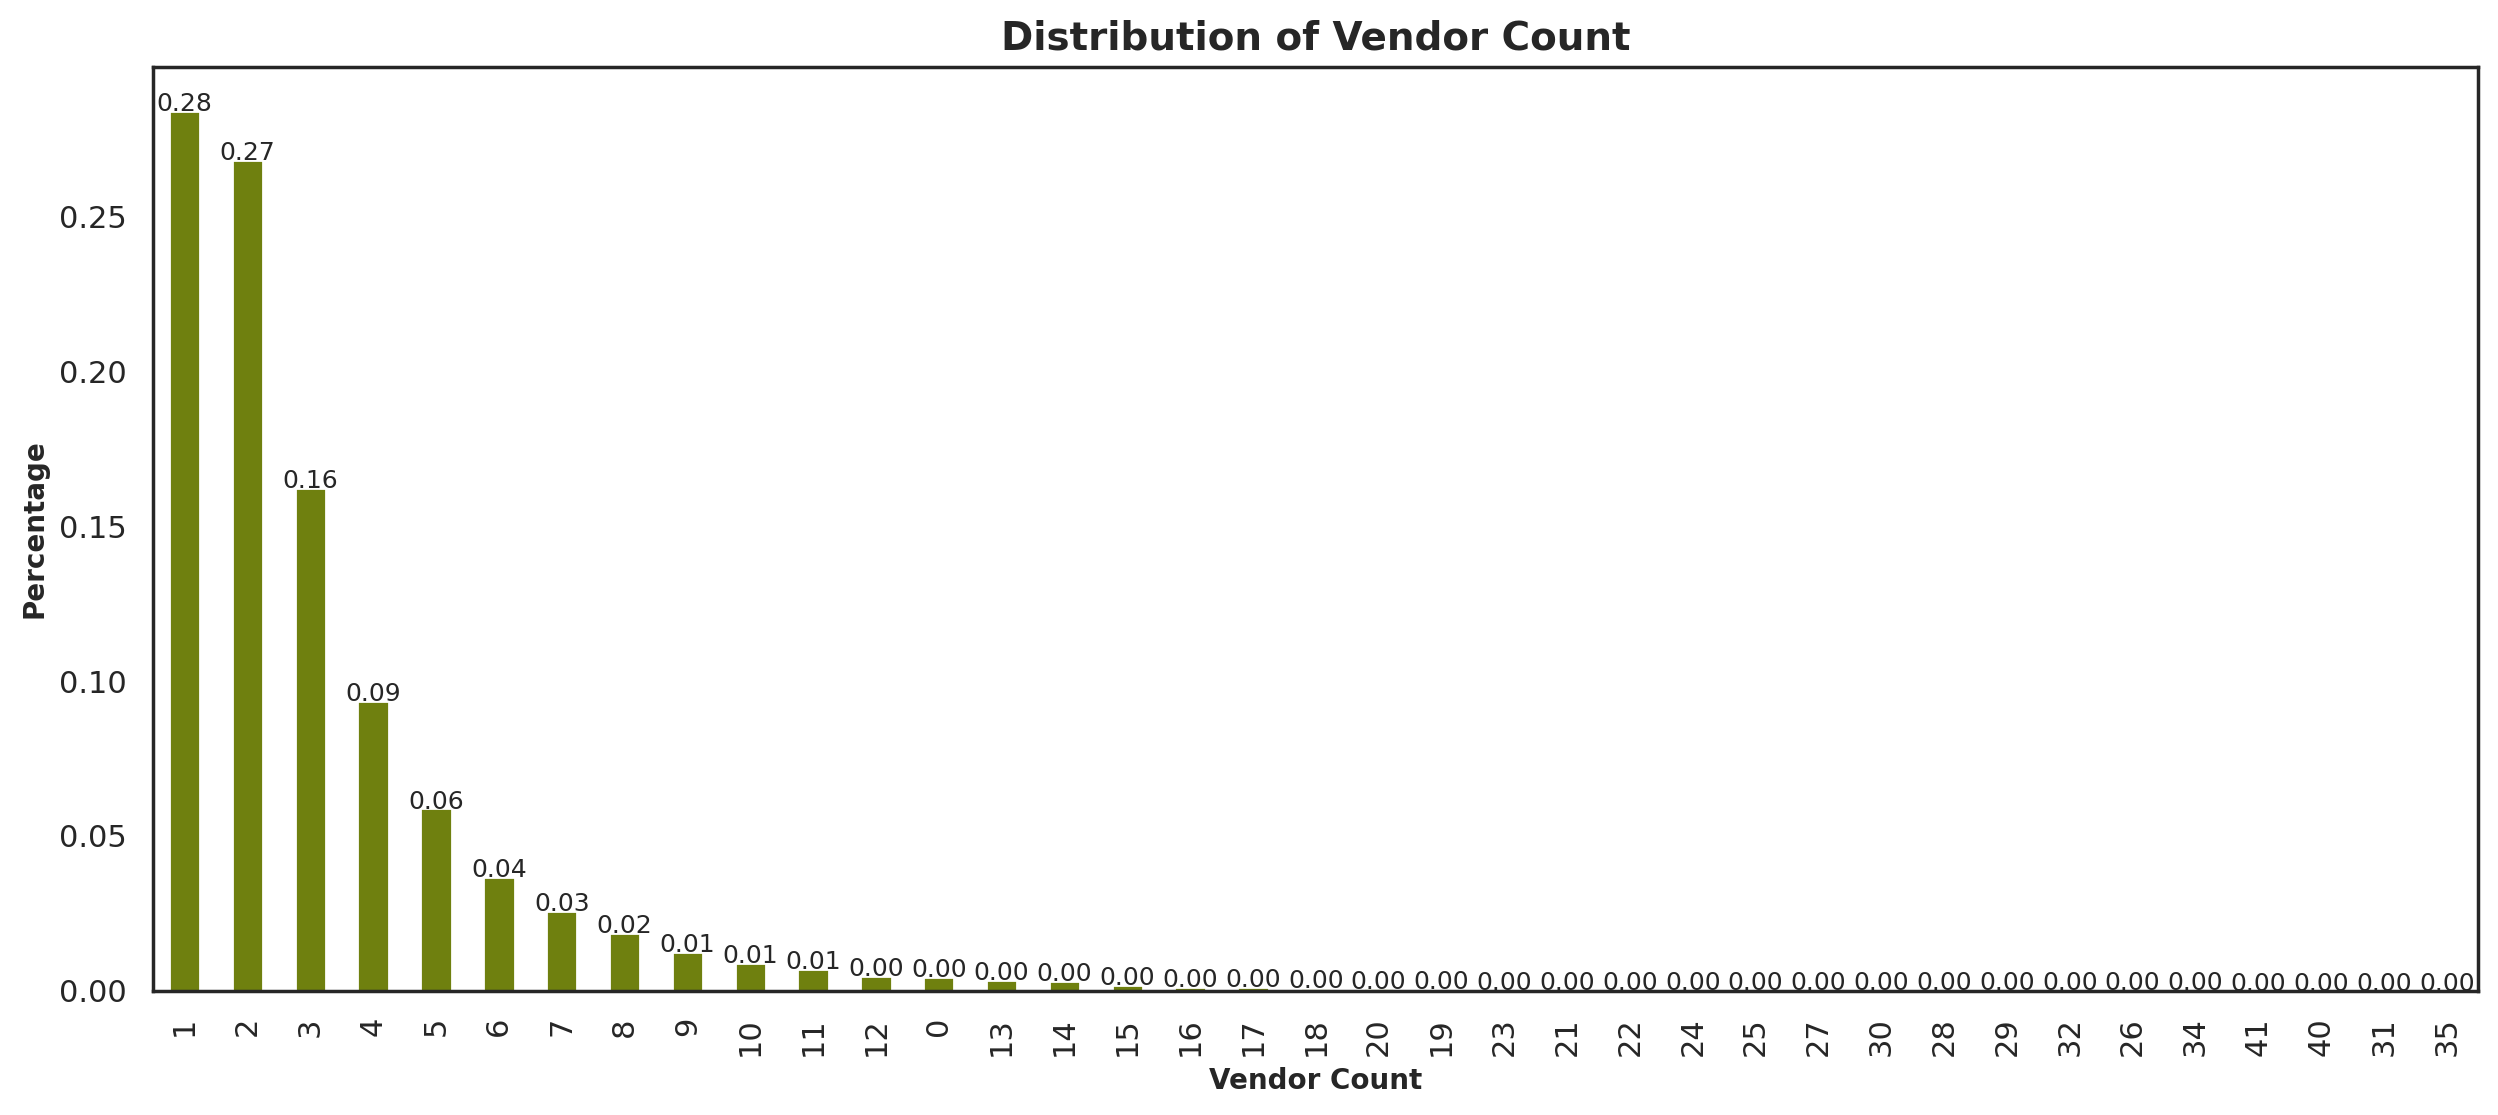

In [21]:
# Frequency of the vendor_count ascending

ABCDEats['vendor_count'].value_counts()

ABCDEats['vendor_count'].value_counts(normalize=True).plot(kind='bar', color='#6f800f', figsize=(15, 6))

plt.title('Distribution of Vendor Count', fontsize=14, fontweight='bold')
plt.xlabel('Vendor Count', fontsize=10, fontweight='bold')
plt.ylabel('Percentage', fontsize=10, fontweight='bold')

for i in range(len(ABCDEats['vendor_count'].value_counts(normalize=True))):
    value = ABCDEats['vendor_count'].value_counts(normalize=True).iloc[i]
    plt.text(i, value, f'{value:.2f}', ha='center', fontsize=9)

plt.show()


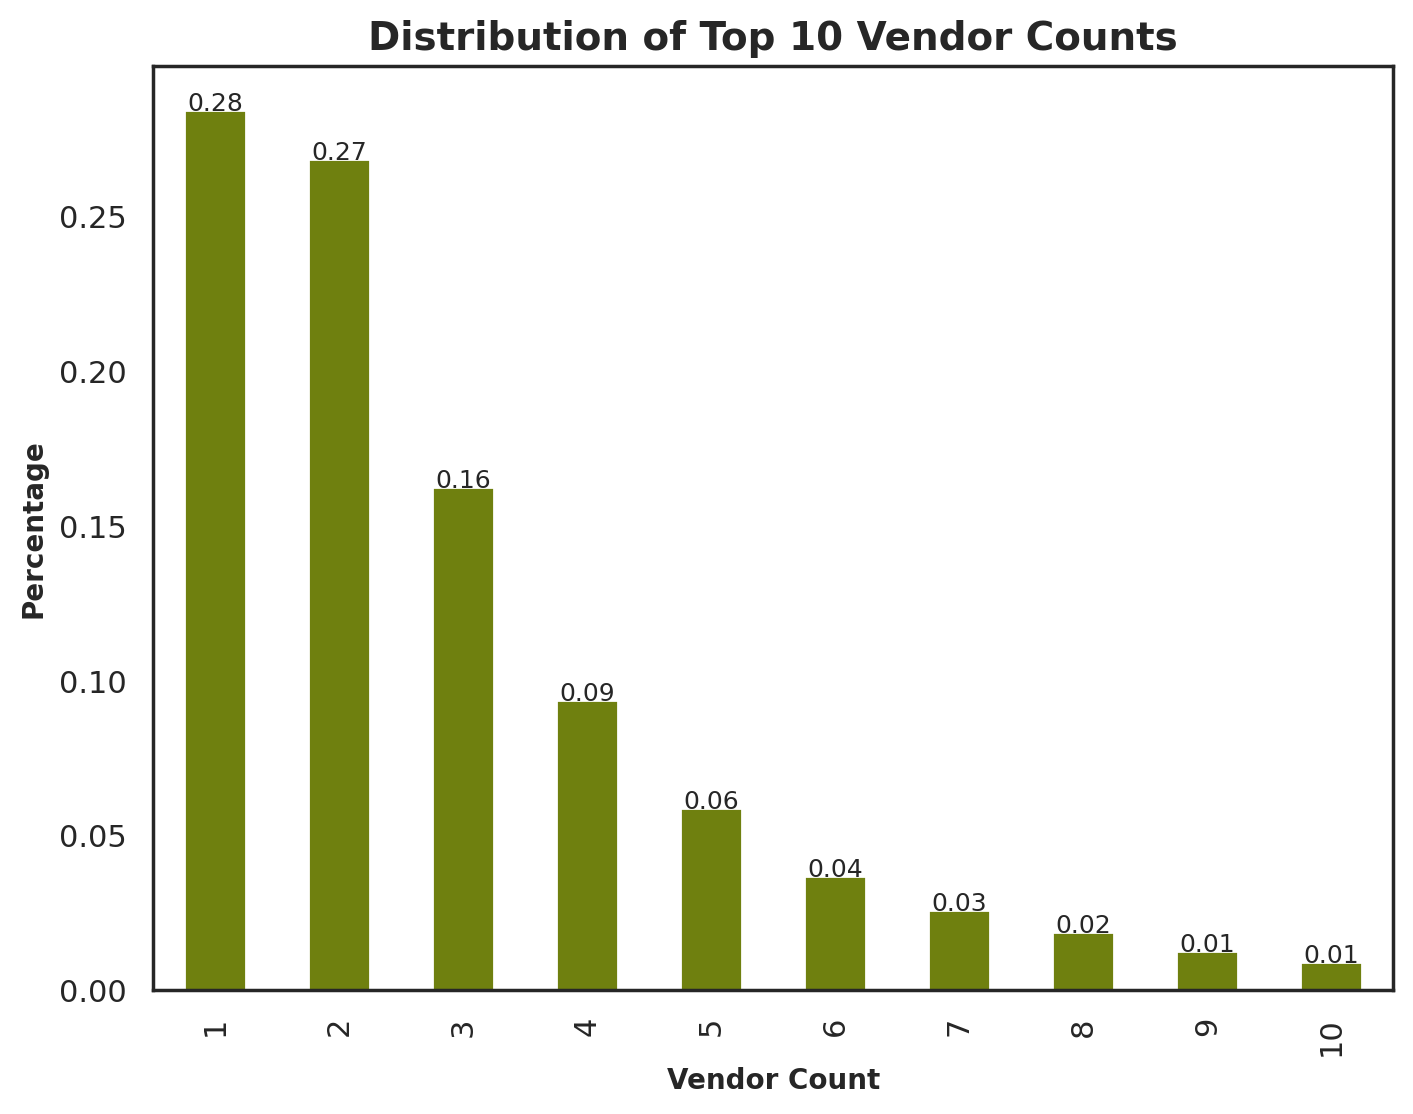

In [22]:
# Get the top 10 most common vendor counts

top_10_vendor_count = ABCDEats['vendor_count'].value_counts(normalize=True).head(10)

top_10_vendor_count.plot(kind='bar', color='#6f800f', figsize=(8, 6))

plt.title('Distribution of Top 10 Vendor Counts', fontsize=14, fontweight='bold')
plt.xlabel('Vendor Count', fontsize=10, fontweight='bold')
plt.ylabel('Percentage', fontsize=10, fontweight='bold')

for i in range(len(top_10_vendor_count)):
    value = top_10_vendor_count.iloc[i]
    plt.text(i, value, f'{value:.2f}', ha='center', fontsize=9)

plt.show()


To further understand the popularity of these vendors, this analysis can be complemented with information such as promos given, special campaigns, time to deliver, food quality and other customer attraction factors.

#### `product_count`

In [23]:
print(sorted(map(int,ABCDEats['product_count'].unique())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 84, 87, 88, 89, 91, 94, 95, 97, 109, 110, 117, 269]


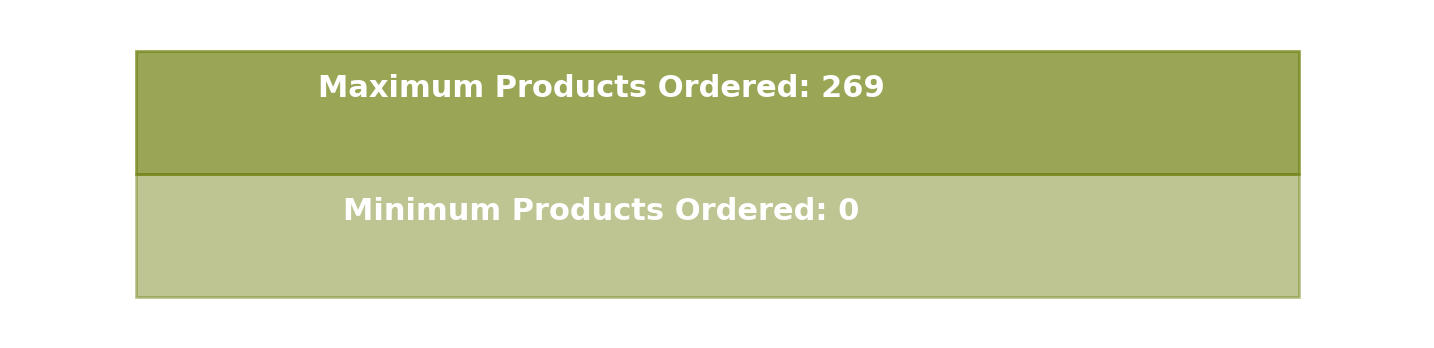

In [24]:

max_products = max(ABCDEats['product_count'])
min_products = min(ABCDEats['product_count'])

fig, ax = plt.subplots(figsize=(9, 2))

ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1)

max_card = plt.Rectangle((0.1, 0.5), 1, 0.4, color='#6f800f', alpha=0.7)
min_card = plt.Rectangle((0.1, 0.1), 1, 0.4, color='#6f800f', alpha=0.45)

ax.add_patch(max_card)
ax.add_patch(min_card)

ax.text(0.5, 0.75, f'Maximum Products Ordered: {max_products}', 
        ha='center', fontsize=11, fontweight='bold', color='white')
ax.text(0.5, 0.35, f'Minimum Products Ordered: {min_products}', 
        ha='center', fontsize=11, fontweight='bold', color='white')

ax.axis('off')

plt.show()


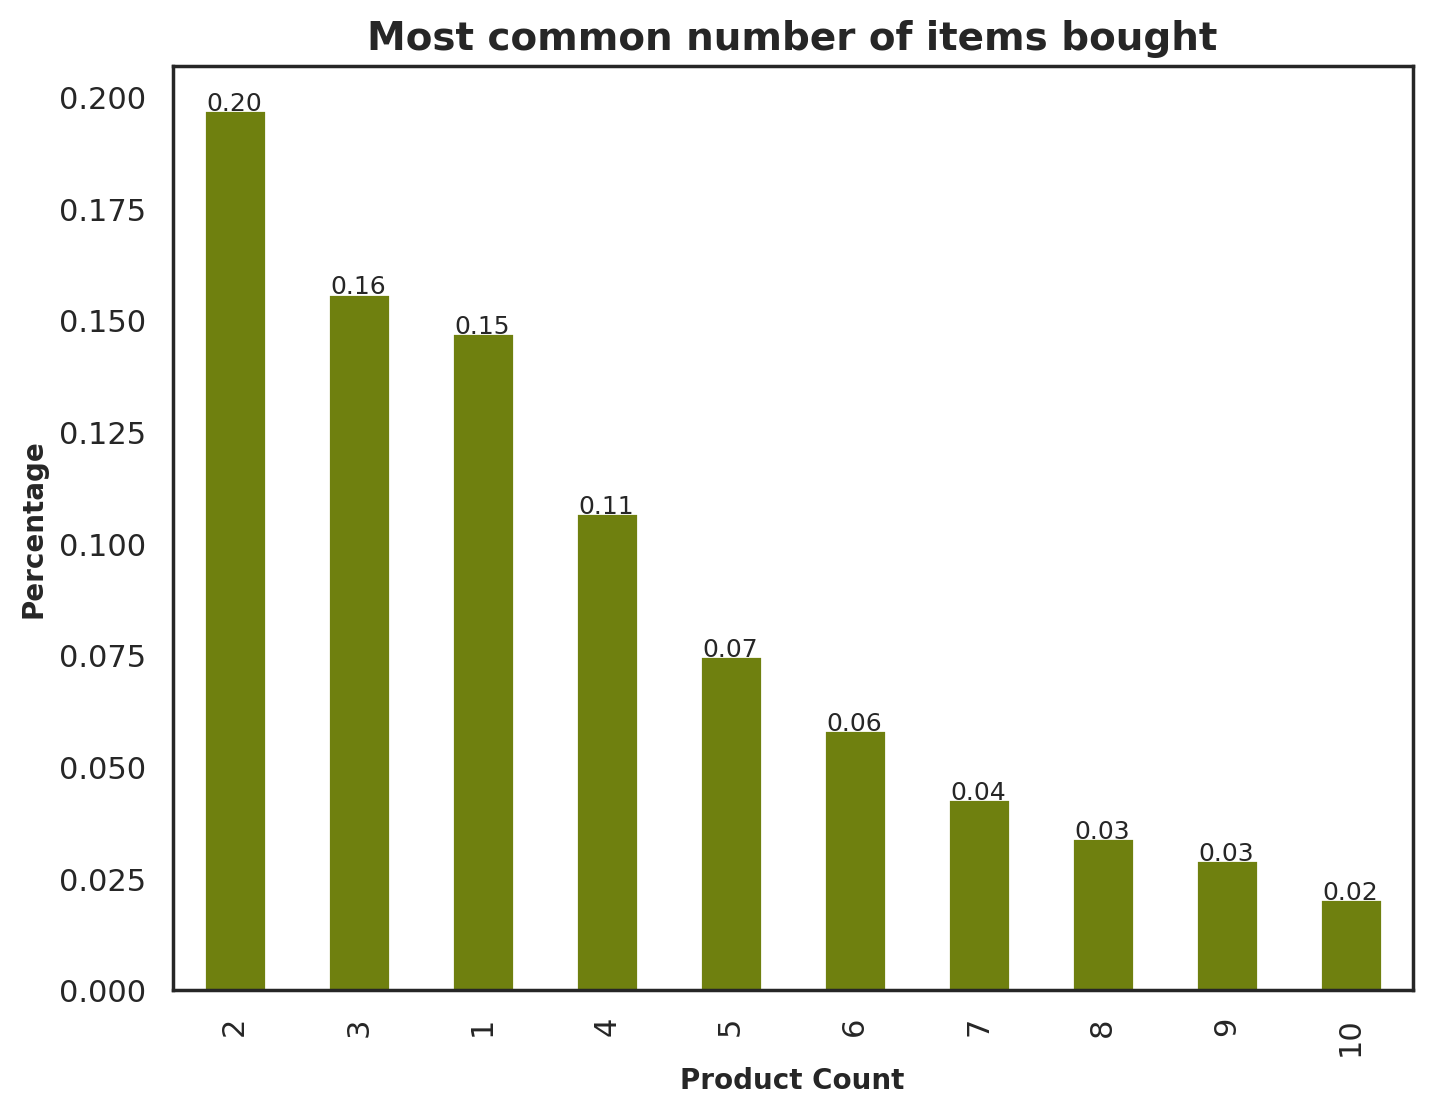

In [ ]:
# most frequent product count



# Get the top 10 most common vendor counts

top_10_product_count = ABCDEats['product_count'].value_counts(normalize=True).head(10)

top_10_product_count.plot(kind='bar', color='#6f800f', figsize=(8, 6))

plt.title('Most common number of items bought', fontsize=14, fontweight='bold')
plt.xlabel('Product Count', fontsize=10, fontweight='bold')
plt.ylabel('Percentage', fontsize=10, fontweight='bold')

for i in range(len(top_10_product_count)):
    value = top_10_product_count.iloc[i]
    plt.text(i, value, f'{value:.2f}', ha='center', fontsize=9)

plt.show()

#### `is_chain`

#### `first_order`

#### `last_order`

#### `last_promo`

#### `payment_method`

In [26]:
# Unique values of the column 'payment_method'
ABCDEats['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

In [ ]:
# Absolute and Relative Frequency Table of the column 'payment_method'
payment_method_n_freq = ABCDEats['payment_method'].value_counts().reset_index()
payment_method_n_freq.columns = ['payment_method', 'n']
payment_method_n_freq['%'] = round(payment_method_n_freq['n'] / ABCDEats.shape[0] * 100, 2)
payment_method_n_freq.set_index('payment_method', inplace=True)
pd.DataFrame(payment_method_n_freq.sort_values(by='n', ascending=False))

,n,%
payment_method,,
CARD,20153,63.23
DIGI,6098,19.13
CASH,5624,17.64


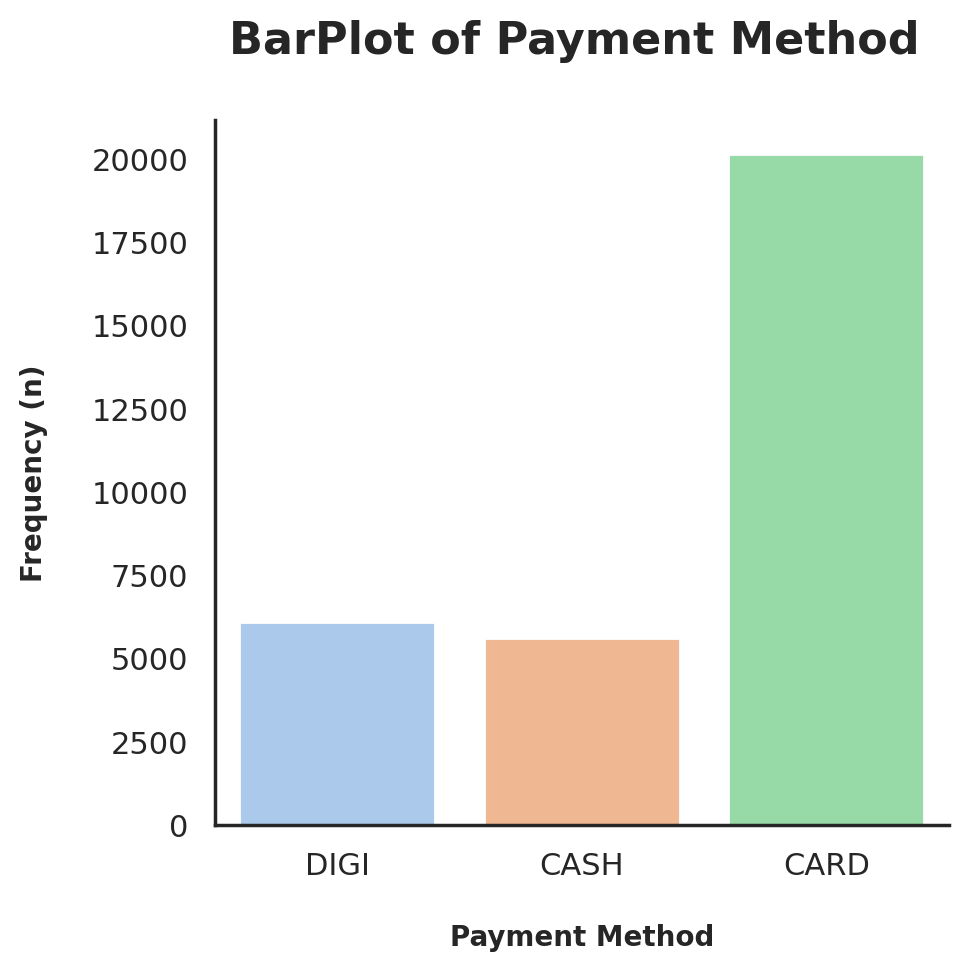

In [ ]:
# Plot the absolute frequency of the column 'payment_method'
plt.figure(figsize=(5, 5))
sns.countplot(data=ABCDEats, x='payment_method', hue='payment_method', palette='pastel')
plt.title('BarPlot of Payment Method \n', fontweight='bold', fontsize=16)
plt.xlabel('\nPayment Method', fontweight='bold', fontsize=10)
plt.ylabel('Frequency (n)\n', fontweight='bold', fontsize=10)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

#### `CUI_American`, `CUI_Asian`, `CUI_Chinese`, `CUI_Italian`, etc.

In [29]:
# Unique values of the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc.
cuisines = [col for col in ABCDEats.columns if 'CUI_' in col]
cuisines

['CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai']

In [ ]:
# Statistics of the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc.
round(ABCDEats[cuisines].describe(), 2)

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
count,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00
mean,4.88,9.96,2.30,0.80,0.77,1.43,0.88,0.95,1.63,3.23,3.00,0.71,3.00,3.91,0.84
std,11.65,23.56,8.48,6.43,3.66,8.19,5.26,5.83,7.44,11.25,10.18,4.54,9.77,15.55,4.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,5.66,11.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,280.21,896.71,229.22,326.10,219.66,739.73,230.07,255.81,309.07,468.33,706.14,275.11,366.08,454.45,136.38


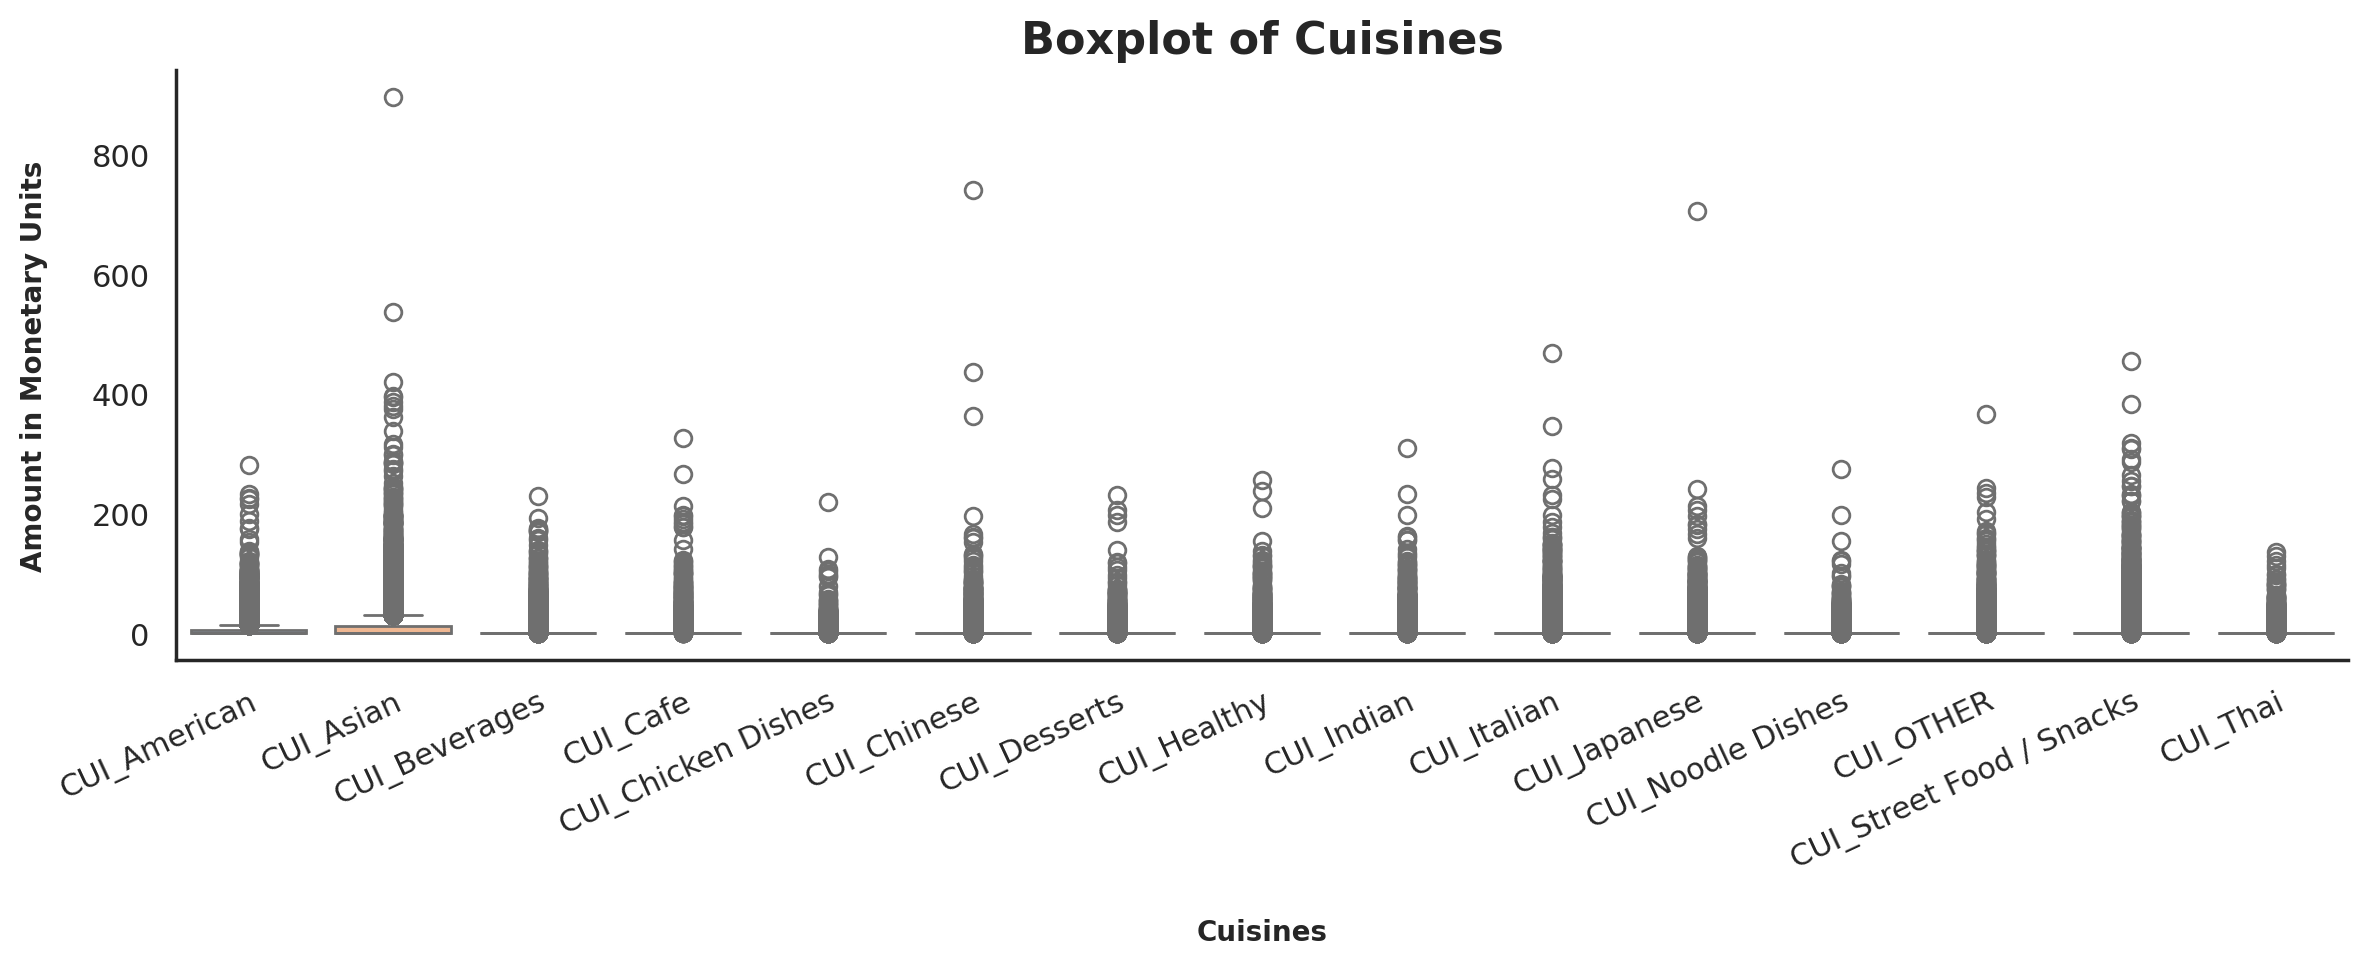

In [31]:
# Boxplot of the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc.
plt.figure(figsize=(12, 5))
sns.boxplot(data=ABCDEats[cuisines], palette='pastel')
plt.title('Boxplot of Cuisines', fontweight='bold', fontsize=16)
plt.xlabel('\nCuisines', fontweight='bold', fontsize=10)
plt.ylabel('Amount in Monetary Units\n', fontweight='bold', fontsize=10)
plt.xticks(rotation=25, ha='right', rotation_mode='anchor')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

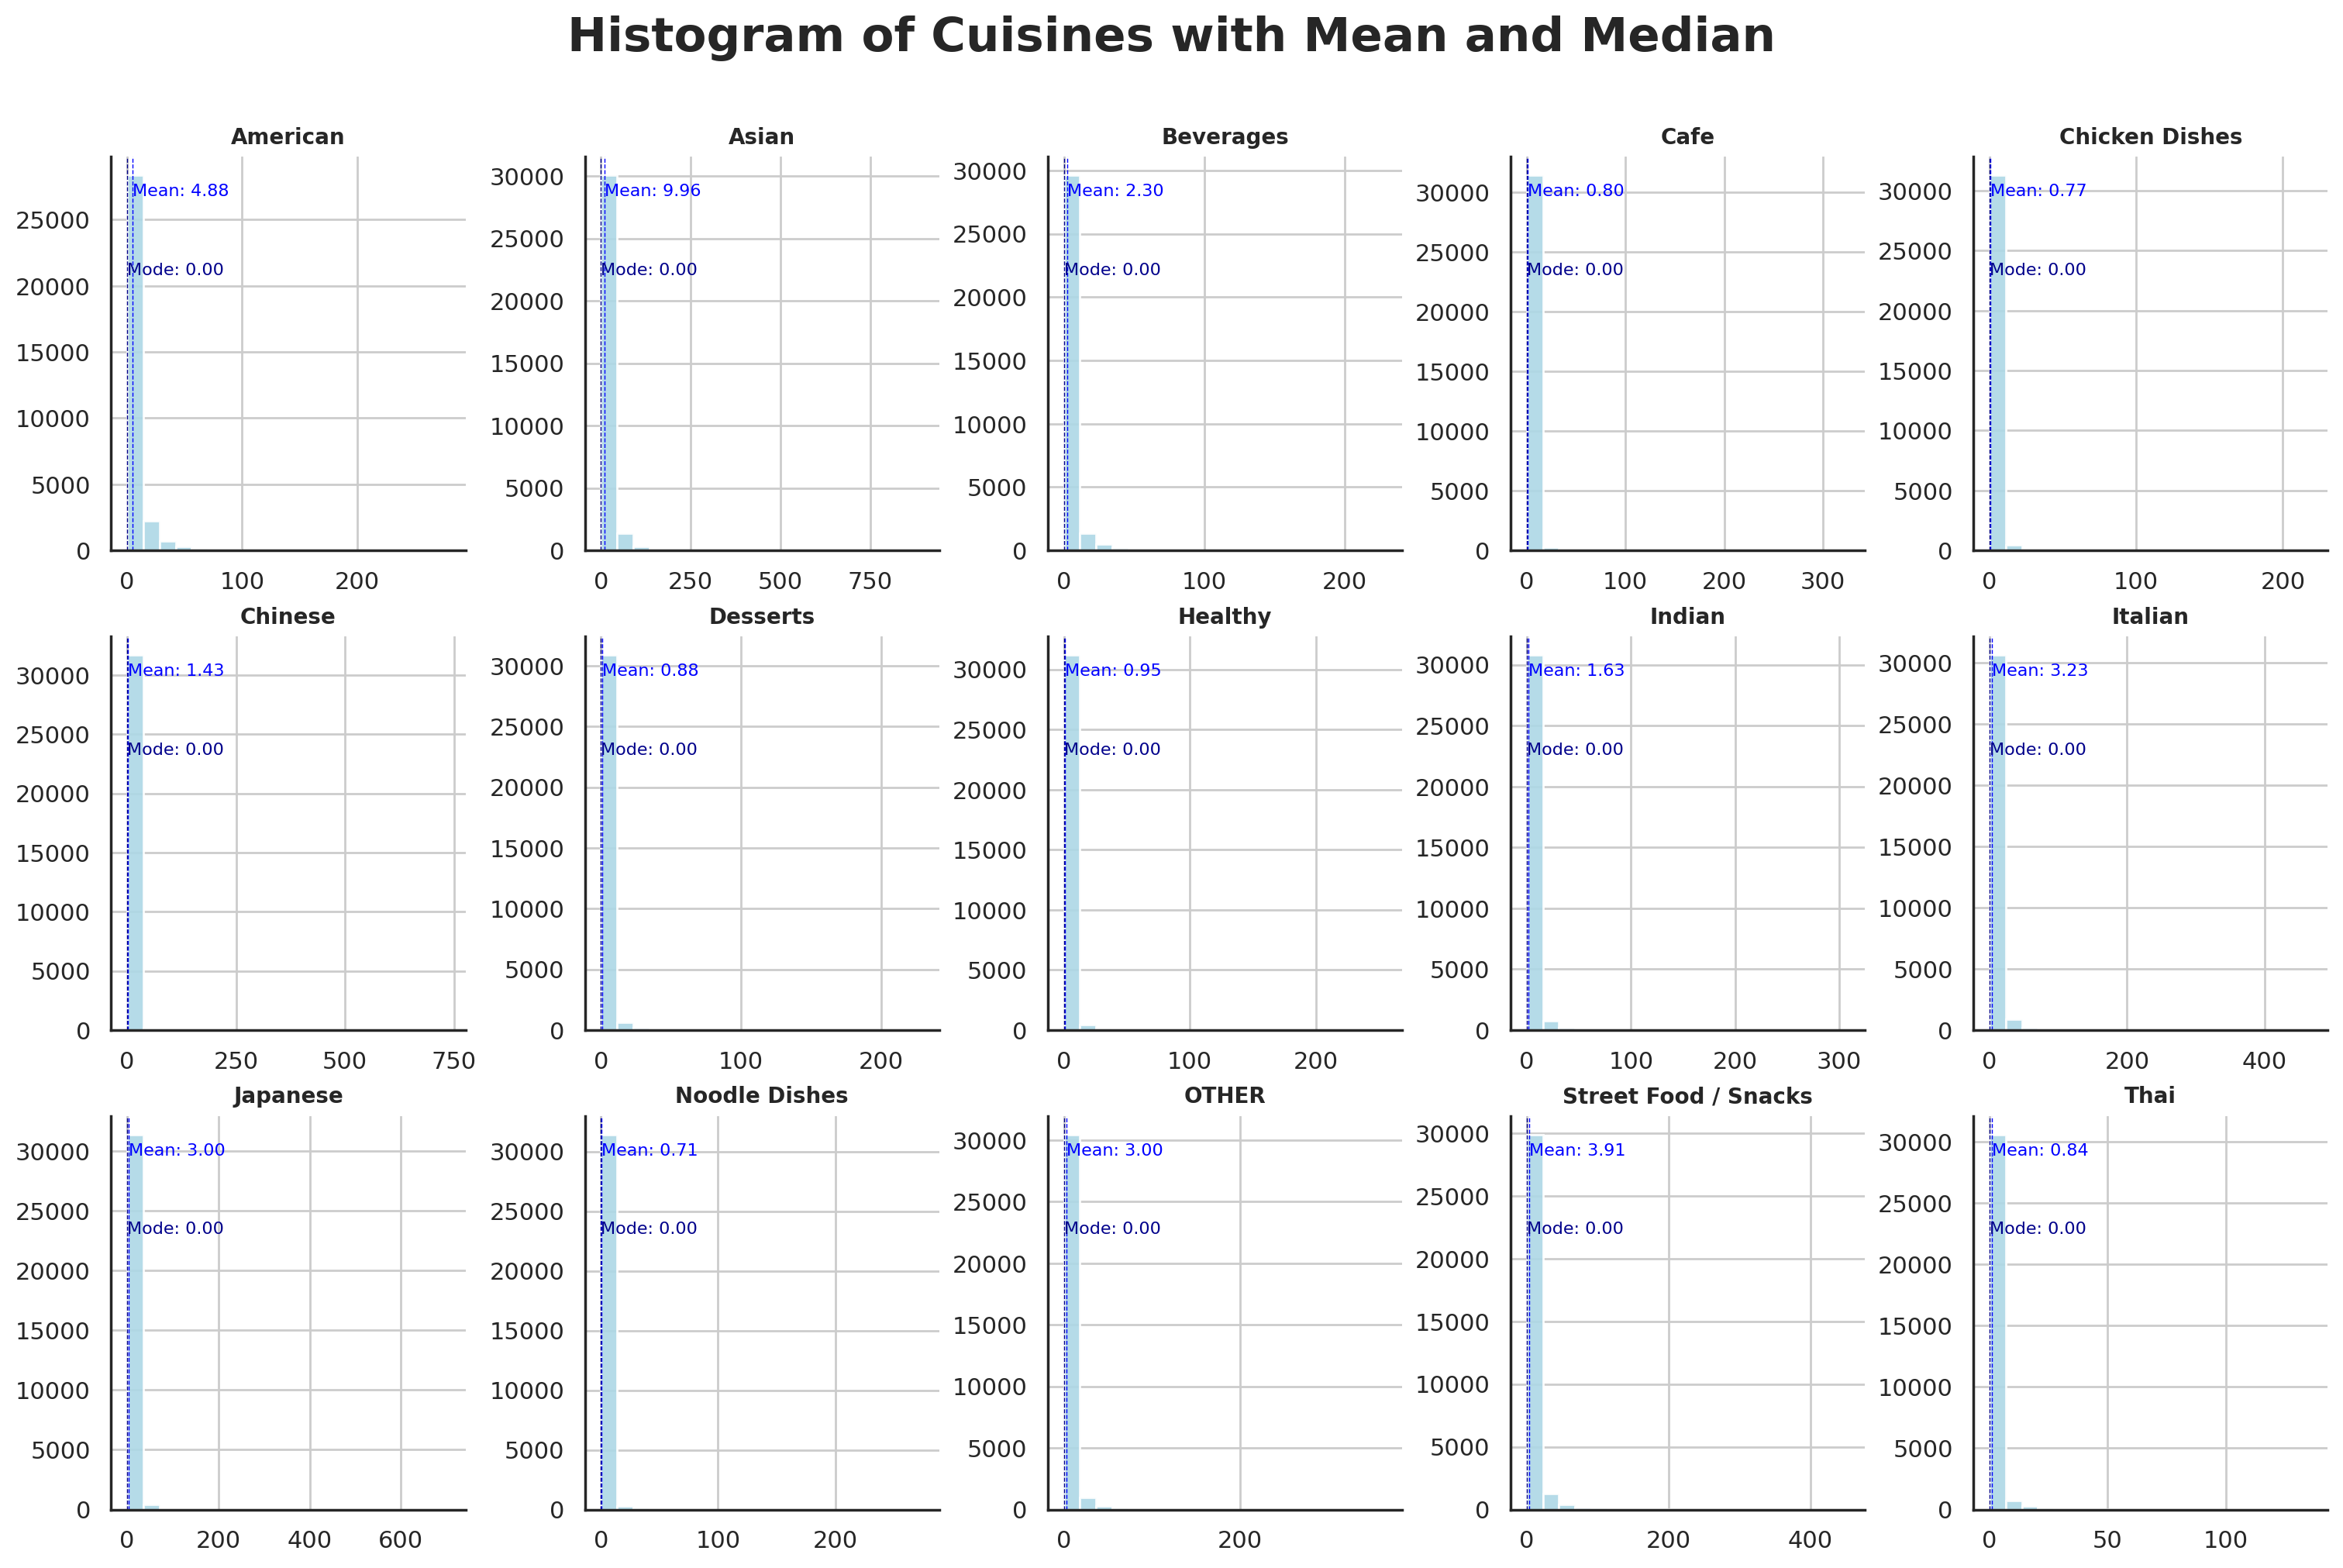

In [32]:
# Histogram with mean and mode lines for the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc.
fig, axes = plt.subplots(nrows=3 , ncols=5, figsize=(15, 10), constrained_layout=True)

for i, col in enumerate(cuisines):
    ax = axes[int(i / 5), i % 5] if 3 > 1 else axes[i]
    ABCDEats[col].hist(bins=20, ax=ax, color='lightblue', alpha=0.9)
    
    # Calculate mean and median
    mean_val = ABCDEats[col].mean()
    median_val = ABCDEats[col].median()
    
    # Plot mean line
    ax.axvline(mean_val, color='blue', linestyle='dashed', linewidth=.5)
    ax.text(mean_val, ax.get_ylim()[1] * 0.9, f'Mean: {mean_val:.2f}', color='blue', fontsize=8)
    
    # Plot median line
    ax.axvline(median_val, color='darkblue', linestyle='dashed', linewidth=.5)
    ax.text(median_val, ax.get_ylim()[1] * 0.7, f'Mode: {median_val:.2f}', color='darkblue', fontsize=8)
    
    ax.set_title(col.replace('CUI_', ''), fontweight='bold', fontsize=10)

fig.suptitle('Histogram of Cuisines with Mean and Median\n', fontweight='bold', fontsize=22)
sns.despine(top=True, right=True)
plt.show()

> Maybe we can create a new column with the total amount spent by the customer in all types of cuisine and other with the most spent cuisine by the customer (possibly the most frequent cuisine that the customer orders).

In [ ]:
# Create a new column with the total amount spent by the customer in all types of cuisine
ABCDEats['CUI_Total_Amount_Spent'] = ABCDEats[cuisines].sum(axis=1)
pd.DataFrame(ABCDEats['CUI_Total_Amount_Spent'].describe())

,CUI_Total_Amount_Spent
count,31875.000000
mean,38.295857
std,46.410657
min,0.000000
25%,12.880000
50%,24.140000
75%,44.970000
max,1418.330000


In [ ]:
# Create a new column with the most spent cuisine by the customer
ABCDEats['CUI_Most_Spent_Cuisine'] = ABCDEats[cuisines].idxmax(axis=1).str.replace('CUI_', '')
CUI_Most_Spent_Cuisine = pd.DataFrame({
    'n': ABCDEats['CUI_Most_Spent_Cuisine'].value_counts(),
    '%': round(ABCDEats['CUI_Most_Spent_Cuisine'].value_counts() / ABCDEats.shape[0] * 100, 2)
}).sort_values(by='n', ascending=False)
CUI_Most_Spent_Cuisine.index.name = 'CUI_Most_Spent_Cuisine'
CUI_Most_Spent_Cuisine

,n,%
CUI_Most_Spent_Cuisine,,
Asian,7021,22.03
American,4308,13.52
OTHER,3134,9.83
Italian,3059,9.60
Japanese,2384,7.48
Street Food / Snacks,2289,7.18
Beverages,2058,6.46
Indian,1689,5.30
Chinese,1330,4.17


#### `DOW_0` to `DOW_6` & `HR_0` to `HR_23`

In [35]:
# Through these variables we can know what number of orders are placed in total by summing all the columns 'DOW_0' to 'DOW_6' or 'HR_0' to 'HR_23'
Total_Orders_DOW = ABCDEats.loc[:, 'DOW_0':'DOW_6'].sum().sum()
Total_Orders_DOW

np.int64(139263)

In [ ]:
# Check if the sum of the columns 'HR_0' to 'HR_23' is equal to the total number of orders
Total_Orders_HR = ABCDEats.loc[:, 'HR_0':'HR_23'].sum().sum()
Total_Orders_HR

np.float64(137711.0)

In [37]:
# Difference between the sum of the columns 'HR_0' to 'HR_23' and the sum of the columns 'DOW_0' to 'DOW_6'
Total_Orders_HR - Total_Orders_DOW

np.float64(-1552.0)

In [ ]:
# Check how many NA values are in the columns 'DOW_0' to 'DOW_6' and 'HR_0' to 'HR_23'
print(ABCDEats.loc[:, 'DOW_0':'DOW_6'].isnull().sum().sum())
print(ABCDEats.loc[:, 'HR_0':'HR_23'].isnull().sum().sum())

0
1164


> The sum of the columns 'HR_0' to 'HR_23' is not equal to the sum of the columns 'DOW_0' to 'DOW_6'. This is a problem of **data inconsistency**. 

In [39]:
# Table with the number of orders placed on each day of the week (DOW_0 to DOW_6) - rows - and each hour of the day (HR_0 to HR_23) - columns
DOW_HR = pd.DataFrame(index=range(7), columns=range(24))

for i in range(7):
    for j in range(24):
        DOW_HR.loc[i, j] = ABCDEats[(ABCDEats[f'DOW_{i}'] > 0) & (ABCDEats[f'HR_{j}'] > 0)].shape[0]

DOW_HR = DOW_HR.apply(pd.to_numeric)
DOW_HR.columns = [f'HR_{i}' for i in range(24)]
DOW_HR.index = [f'DOW_{i}' for i in range(7)]
DOW_HR

,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
DOW_0,0,703,764,1203,1128,993,880,1011,1595,2596,3444,3846,3346,2857,2675,2882,3274,3504,3163,2462,1627,953,640,614
DOW_1,0,637,712,1170,1106,961,865,990,1567,2602,3391,3771,3368,2895,2655,2889,3335,3602,3214,2489,1659,977,666,608
DOW_2,0,652,739,1169,1141,986,858,997,1630,2656,3540,3943,3470,2941,2709,3064,3513,3835,3345,2577,1655,963,696,653
DOW_3,0,675,727,1186,1097,1014,896,1036,1664,2699,3526,4027,3573,3027,2812,3284,3754,3997,3524,2696,1726,1005,657,631
DOW_4,0,663,784,1190,1100,975,896,1066,1738,2814,3681,4208,3696,3141,2973,3447,4104,4372,3907,2962,1864,1083,712,672
DOW_5,0,707,797,1137,1153,1021,916,1047,1631,2638,3480,4071,3584,3142,2866,3281,3868,4182,3754,2861,1805,1083,708,664
DOW_6,0,723,771,1107,1151,1021,896,1028,1669,2738,3632,4199,3794,3251,3033,3376,3918,4164,3863,2836,1810,1055,682,689


In [40]:
# Replace 0 to 6 by the name of the day of the week (0 = Sunday, 6 = Saturday)
DOW_HR.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

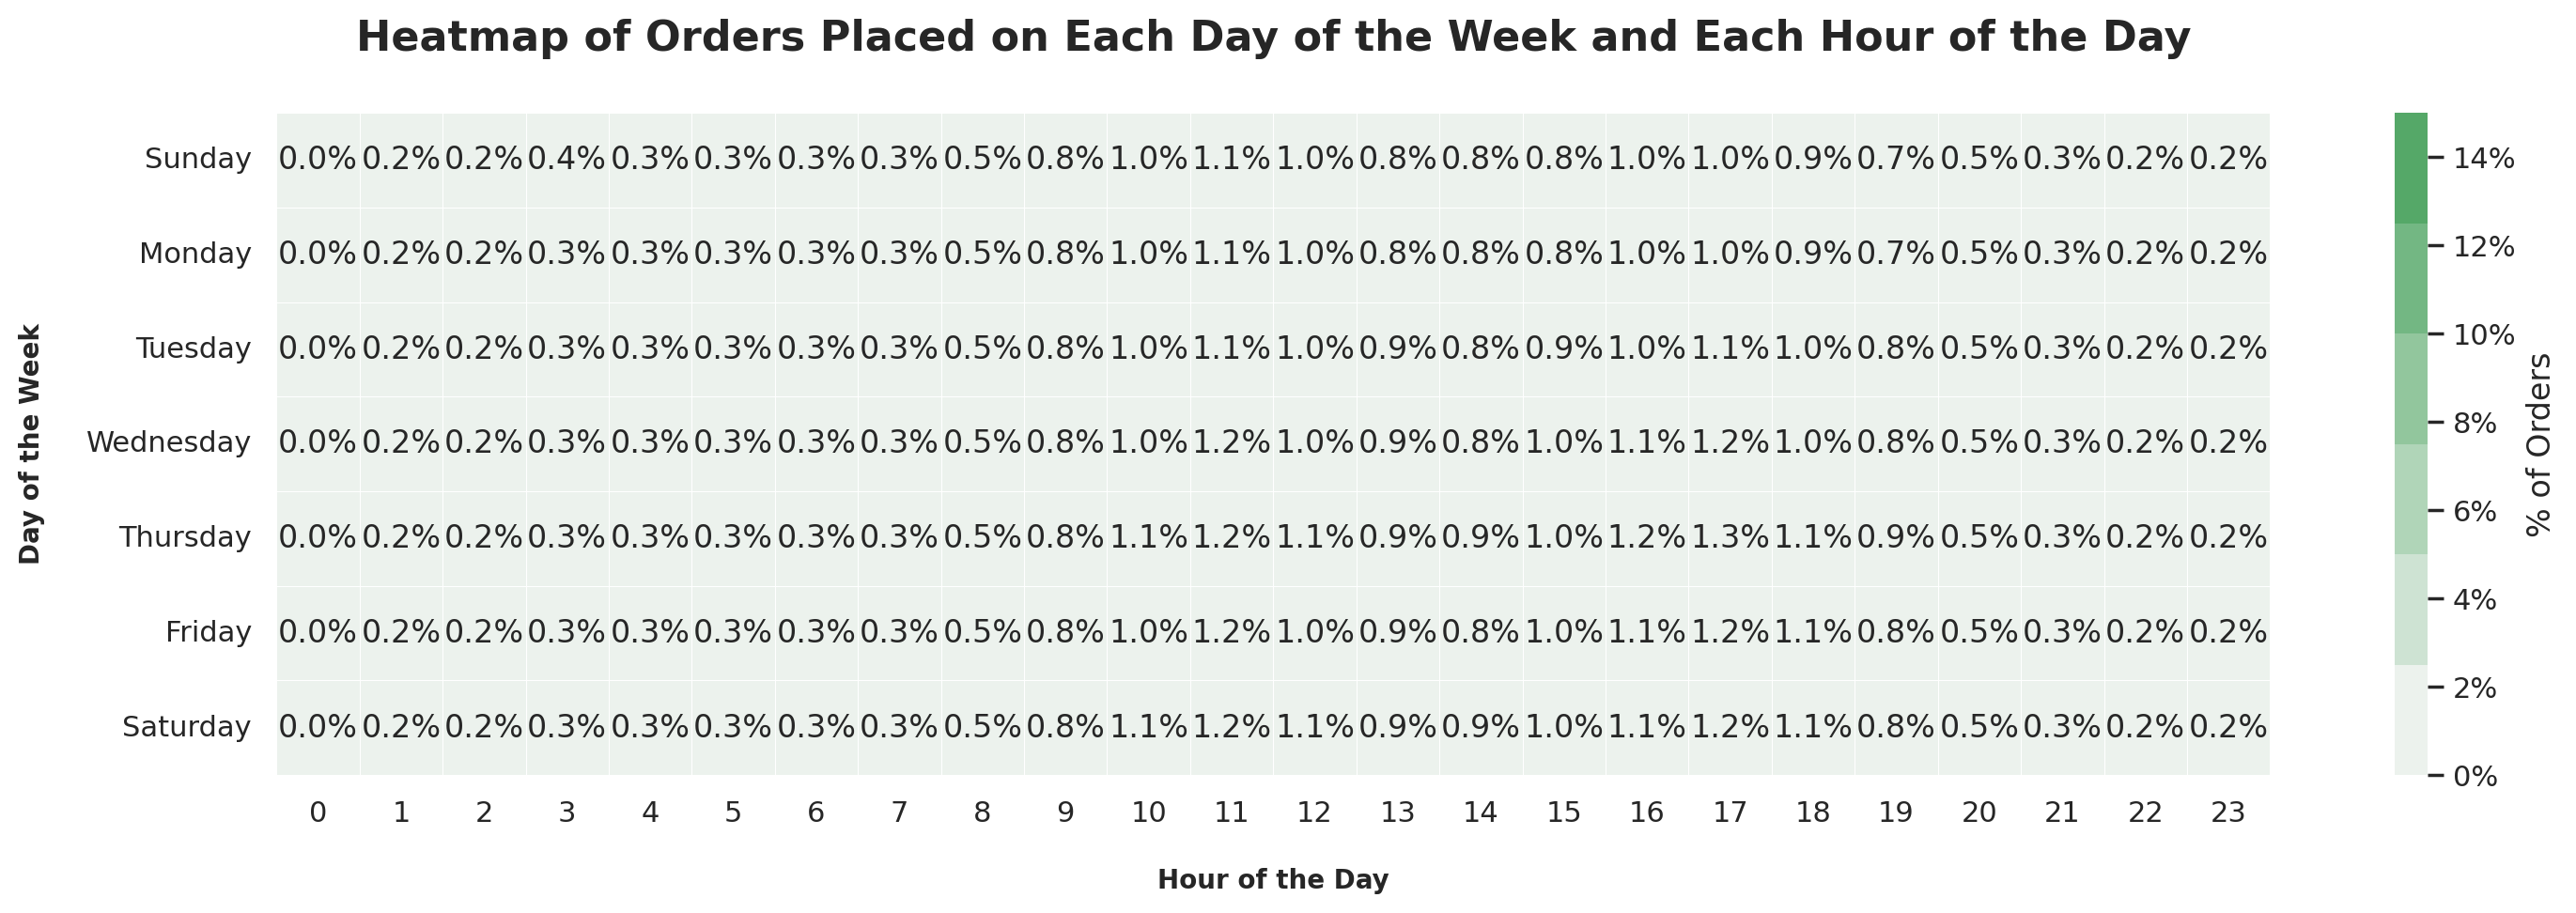

In [41]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

# Change the xticks and yticks to be more readable
DOW_HR.columns = [f'{i}' for i in range(24)]
# DOW_HR.index = [f'{i}' for i in range(7)]

# Heatmap of the % of orders placed on each day of the week (DOW_0 to DOW_6) and each hour of the day (HR_0 to HR_23)
plt.figure(figsize=(15, 5))
fmt = lambda y, _: f'{y :0.0%}'
sns.heatmap(DOW_HR / DOW_HR.sum().sum(),                    # ################# DECIDIR Não faz muito sentido :( ###############
            vmin=0.0,
            vmax=0.15,
            cmap=sns.light_palette(sns_c[2]), 
            annot=True, 
            fmt='0.1%', 
            linewidths=.2, 
            linecolor='white',
            cbar_kws={'label': '% of Orders',
                      'format': mtick.FuncFormatter(fmt)},
            )
plt.title('Heatmap of Orders Placed on Each Day of the Week and Each Hour of the Day\n', fontweight='bold', fontsize=16)
plt.xlabel('\nHour of the Day', fontweight='bold', fontsize=10)
plt.ylabel('Day of the Week\n', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

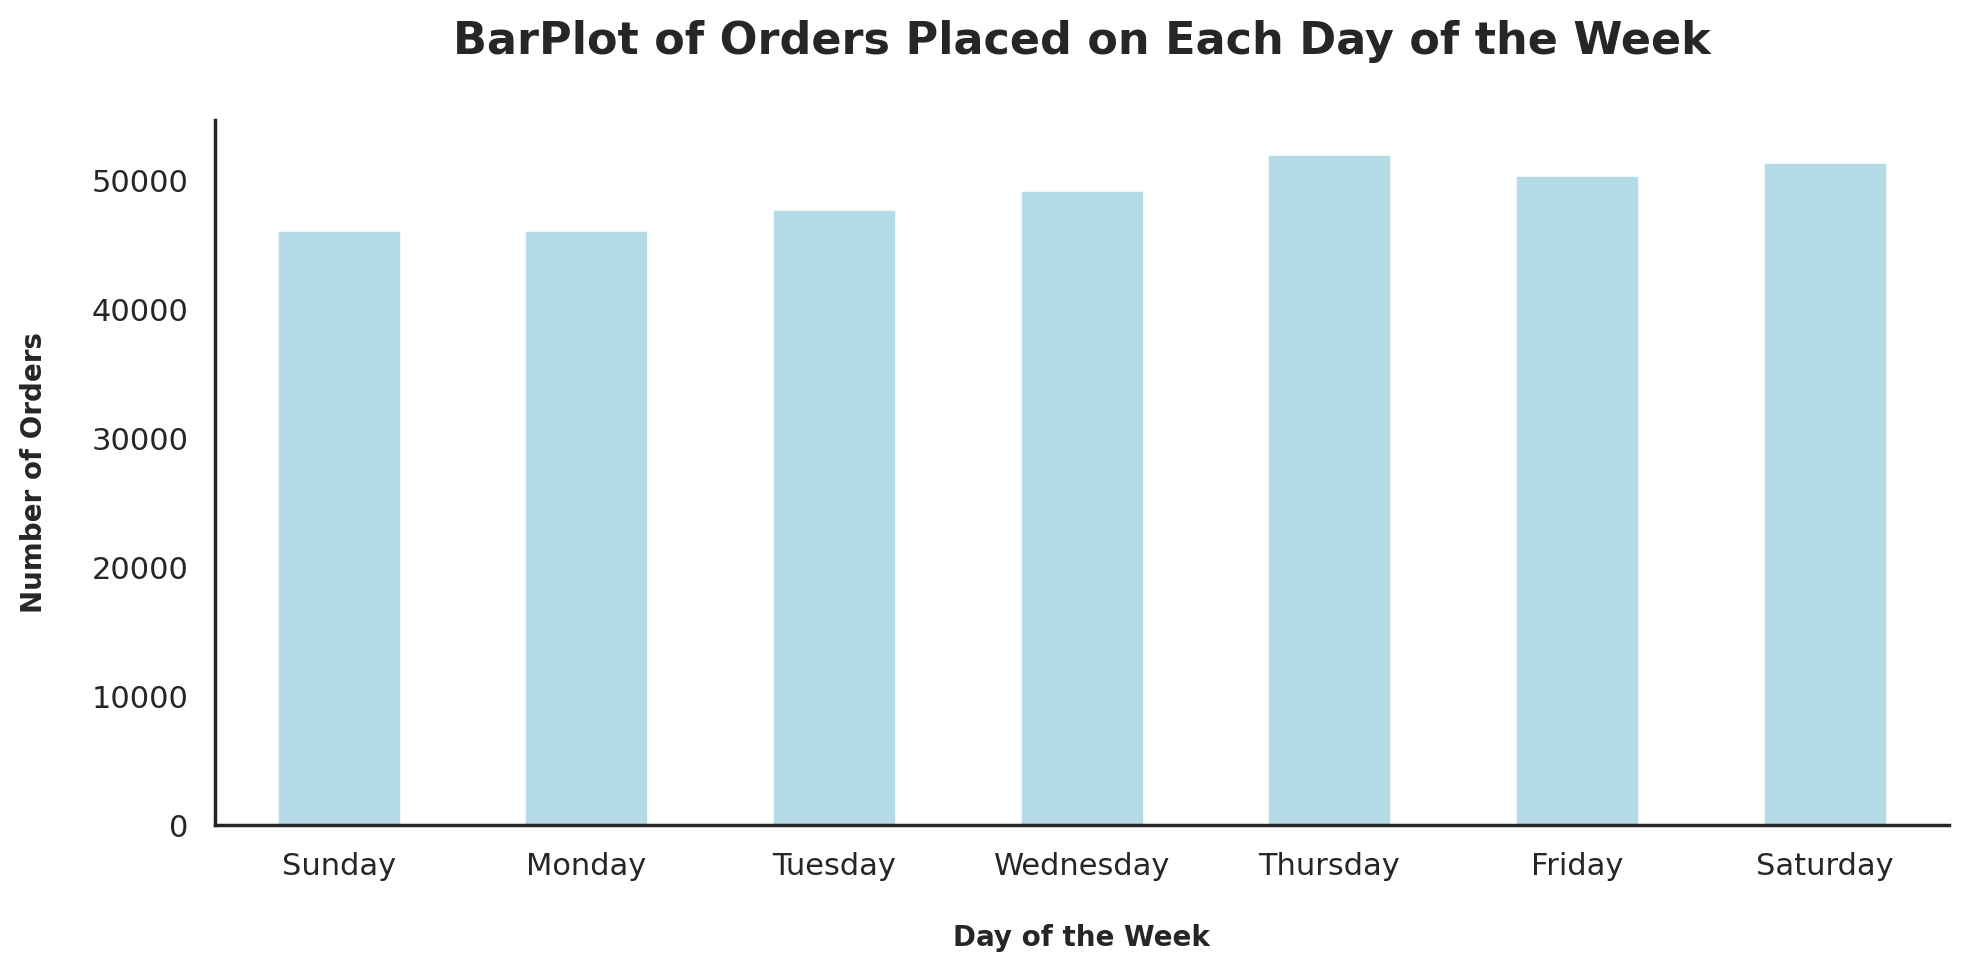

In [42]:
sns.set_theme(style='white')

# Plot the number of orders placed on each day of the week (DOW_0 to DOW_6)
plt.figure(figsize=(10, 5))
DOW_HR.sum(axis=1).plot(kind='bar', color='lightblue', alpha=0.9)
plt.title('BarPlot of Orders Placed on Each Day of the Week\n', fontweight='bold', fontsize=16)
plt.xlabel('\nDay of the Week', fontweight='bold', fontsize=10)
plt.ylabel('Number of Orders\n', fontweight='bold', fontsize=10)
plt.xticks(rotation=0, ha='center')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

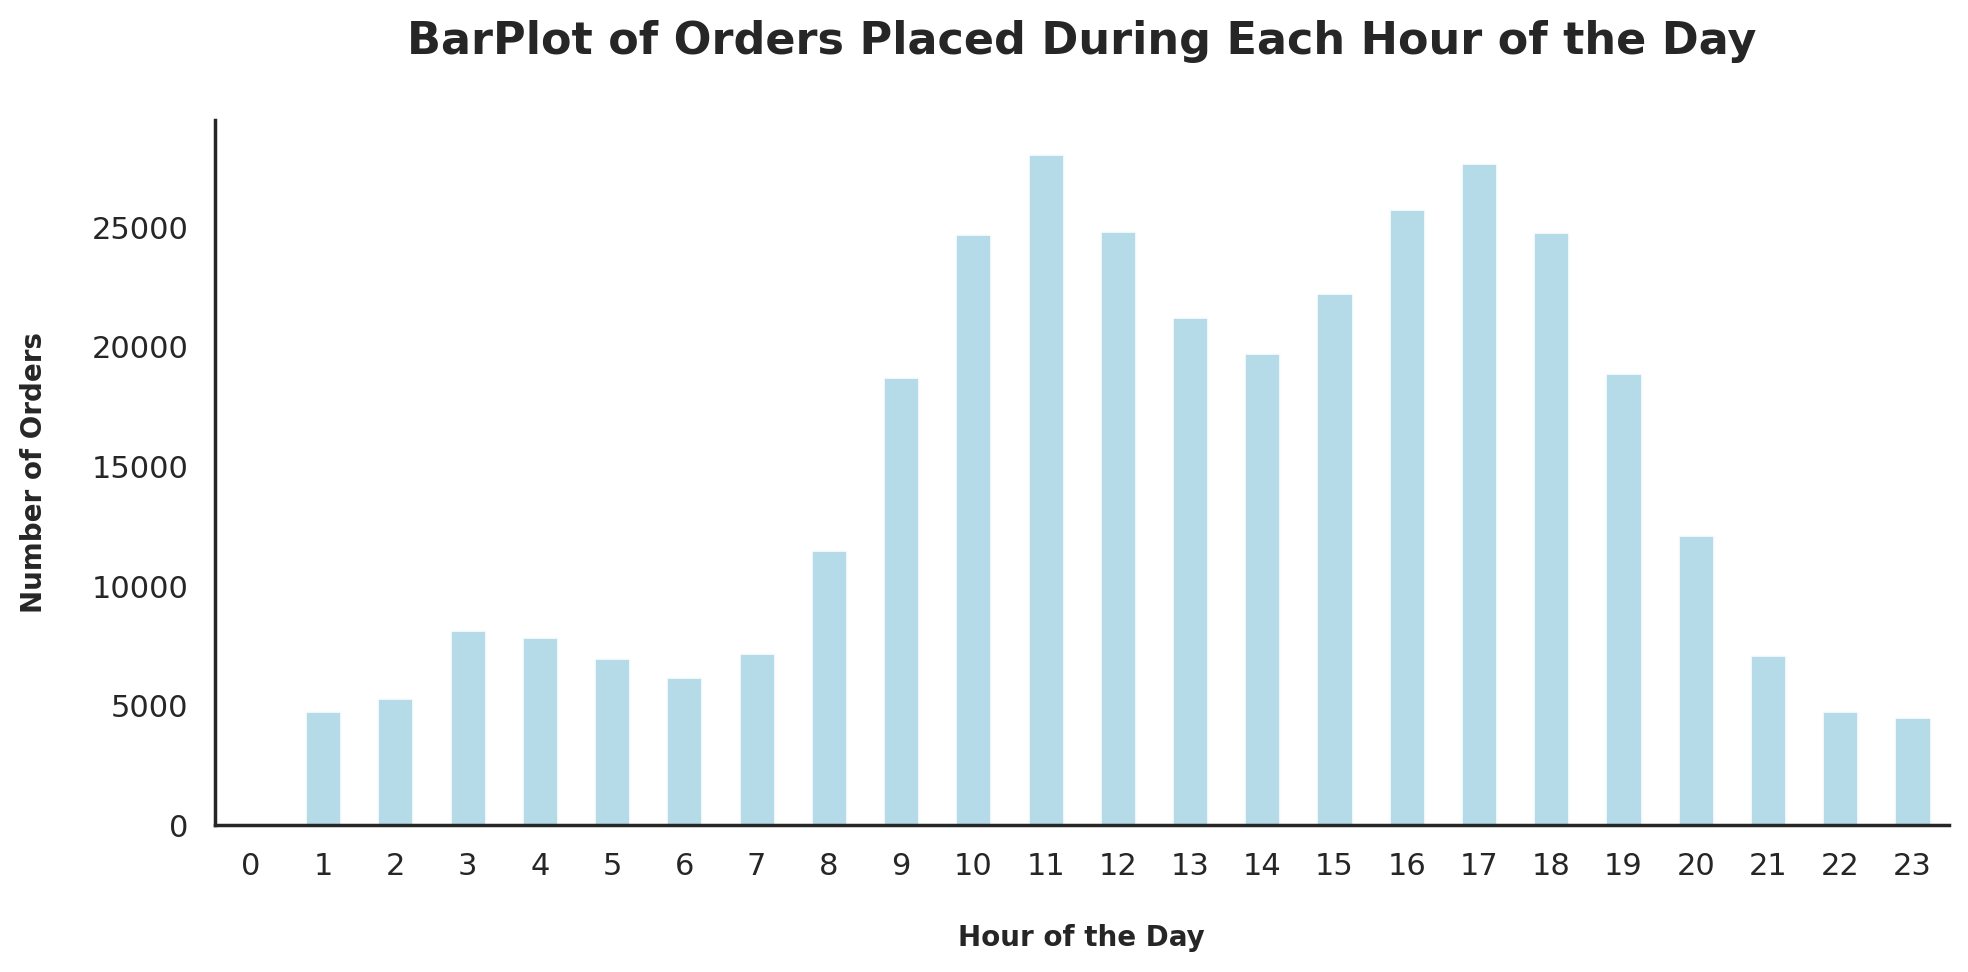

In [43]:
# Plot the number of orders placed during each hour of the day (HR_0 to HR_23)
plt.figure(figsize=(10, 5))
DOW_HR.sum(axis=0).plot(kind='bar', color='lightblue', alpha=0.9)
plt.title('BarPlot of Orders Placed During Each Hour of the Day\n', fontweight='bold', fontsize=16)
plt.xlabel('\nHour of the Day', fontweight='bold', fontsize=10)
plt.ylabel('Number of Orders\n', fontweight='bold', fontsize=10)
plt.xticks(rotation=0, ha='center')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

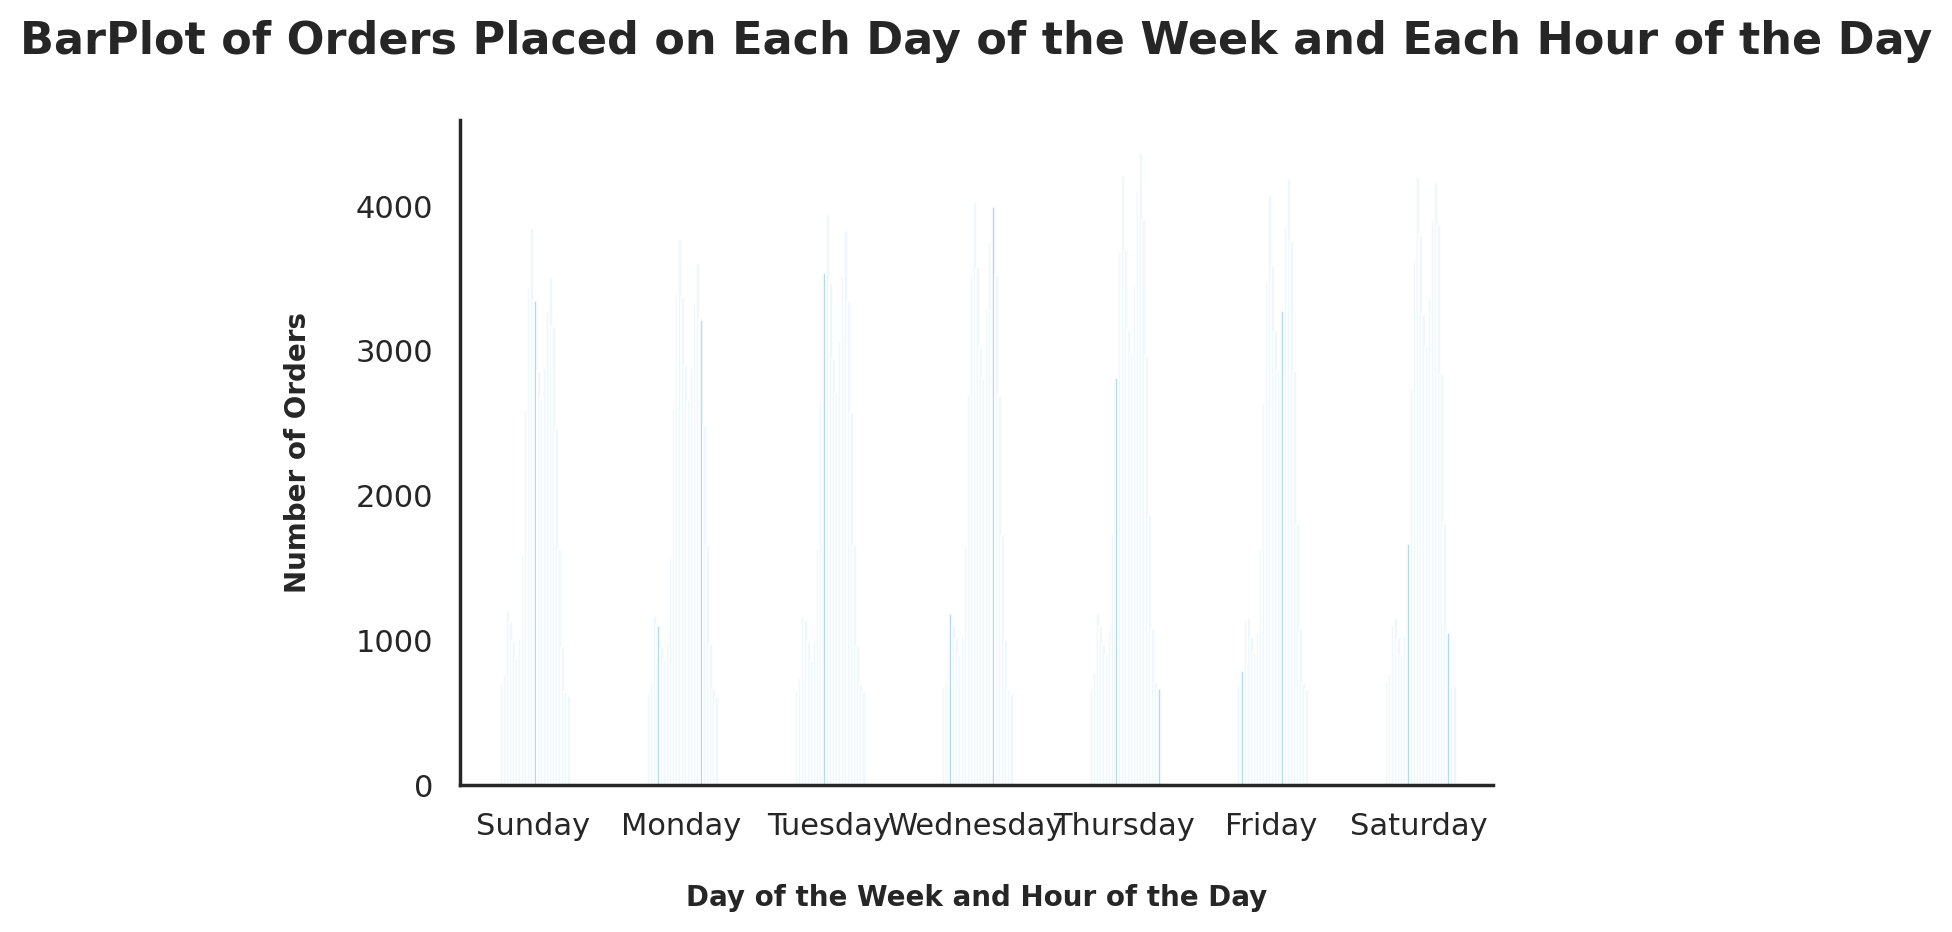

In [44]:
# Plot the number of orders placed on each day of the week (DOW_0 to DOW_6) and each hour of the day (HR_0 to HR_23)
plt.figure(figsize=(15, 5))
DOW_HR.plot(kind='bar', color='lightblue', alpha=0.9)
plt.legend().remove()
plt.title('BarPlot of Orders Placed on Each Day of the Week and Each Hour of the Day\n', fontweight='bold', fontsize=16)
plt.xlabel('\nDay of the Week and Hour of the Day', fontweight='bold', fontsize=10)
plt.ylabel('Number of Orders\n', fontweight='bold', fontsize=10)
plt.xticks(rotation=0, ha='center')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

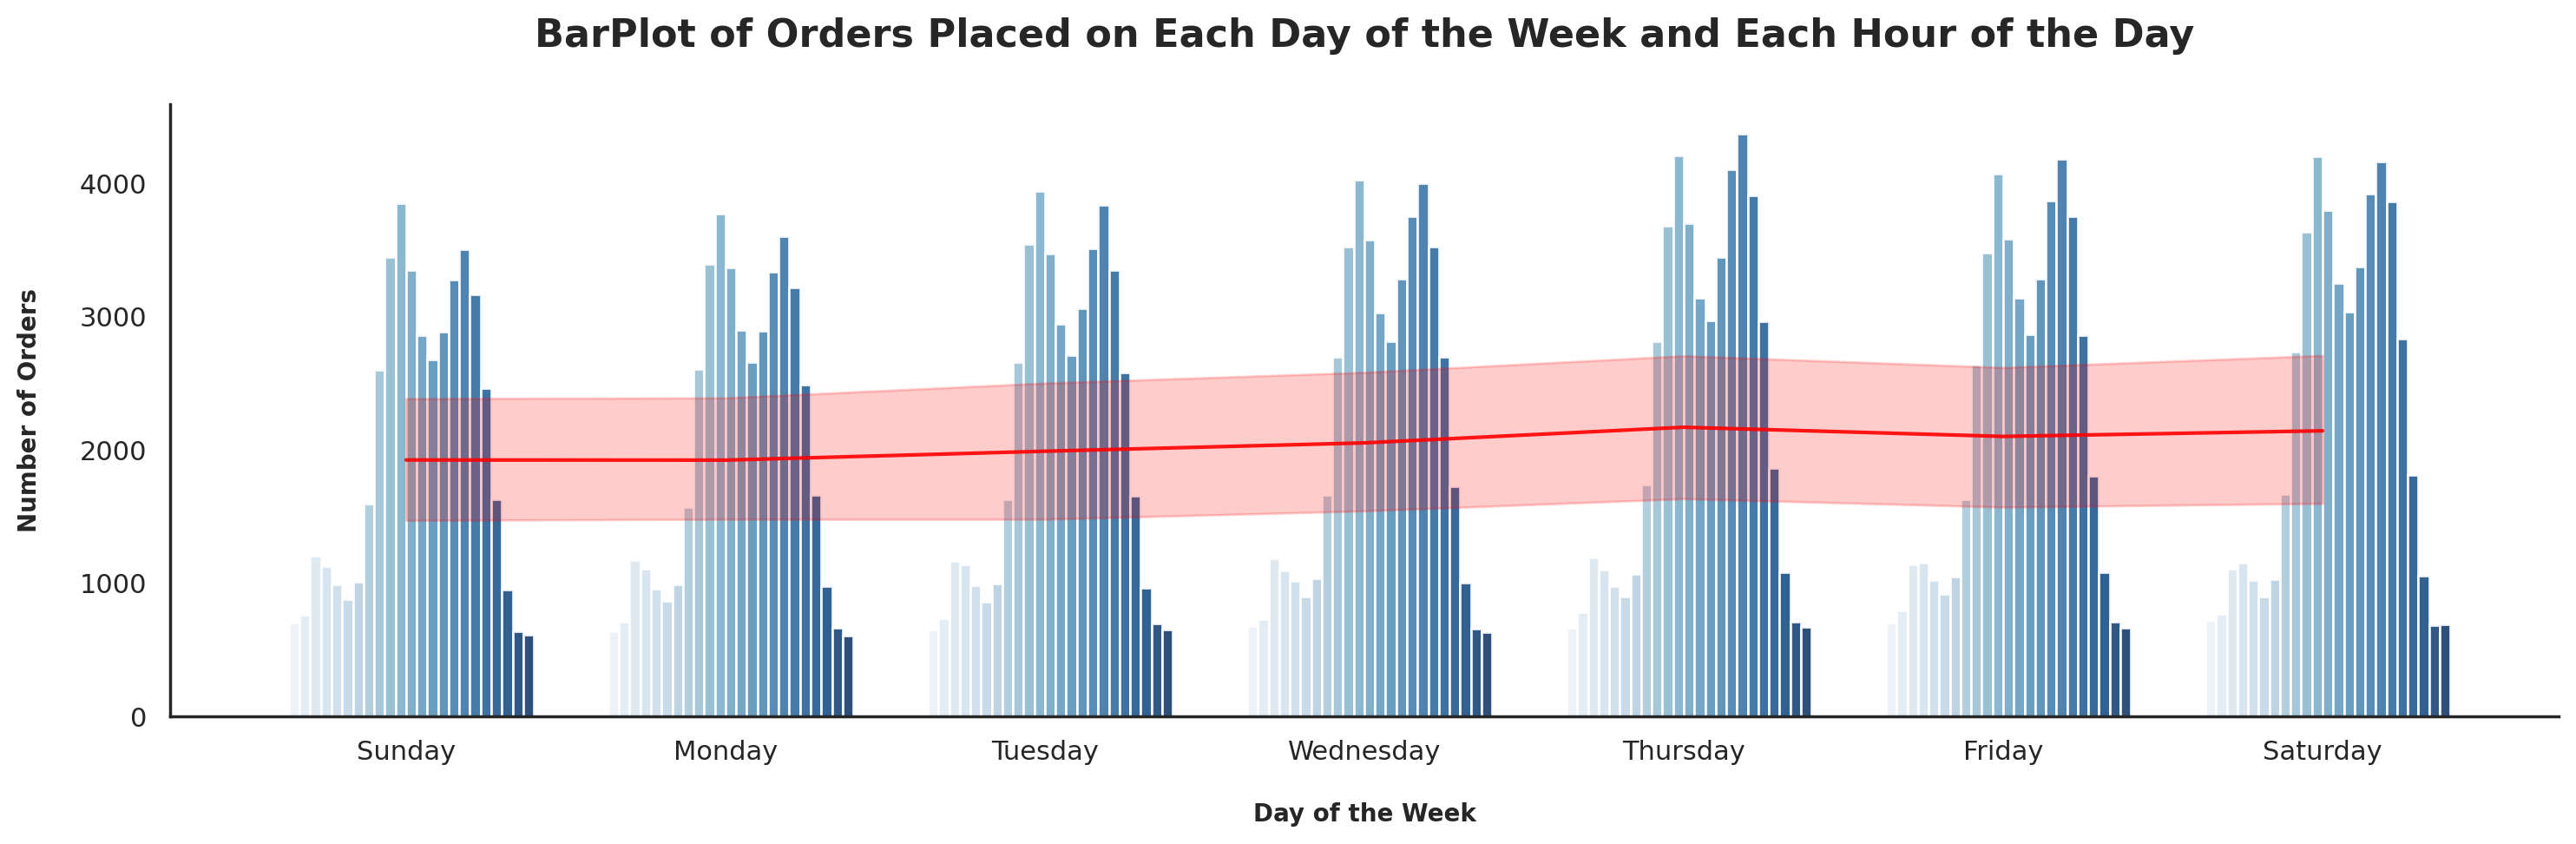

In [45]:
# Convert the DataFrame DOW_HR to a long format (melt) for ease of use in seaborn
DOW_HR_melt = DOW_HR.reset_index().melt(id_vars='index', var_name='Hour', value_name='Number of Orders')

# Rename the 'index' column to 'Day' for easier interpretation
DOW_HR_melt.rename(columns={'index': 'Day'}, inplace=True)

# Plot the number of orders placed on each day of the week (DOW_0 to DOW_6) and each hour of the day (HR_0 to HR_23)
plt.figure(figsize=(15, 5))
sns.barplot(x='Day', y='Number of Orders', hue='Hour', data=DOW_HR_melt, palette='Blues', alpha=0.9)

# plt.legend(title='Hour of the Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('BarPlot of Orders Placed on Each Day of the Week and Each Hour of the Day\n', fontweight='bold', fontsize=16)
plt.xlabel('\nDay of the Week', fontweight='bold', fontsize=10)
plt.ylabel('Number of Orders\n', fontweight='bold', fontsize=10)

# Plot the line of tendency
sns.lineplot(x='Day', y='Number of Orders', data=DOW_HR_melt, color='red', alpha=0.9)
plt.legend().remove()
plt.xticks(rotation=0, ha='center')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [46]:
# Check the DataFrame DOW_HR_melt sorted by 'Hour' in ascending order
DOW_HR_melt.assign(Hour=DOW_HR_melt['Hour'].astype(int)).sort_values(by='Hour', ascending=True)

,Day,Hour,Number of Orders
0,Sunday,0,0
1,Monday,0,0
2,Tuesday,0,0
3,Wednesday,0,0
4,Thursday,0,0
...,...,...,...
163,Tuesday,23,653
164,Wednesday,23,631
165,Thursday,23,672
166,Friday,23,664


> The number of orders placed on each hour of the day is approximately the same for each day of the week. 

> The number of orders placed on each day of the week is higher on **Thursday**, **Friday** and **Saturday**, and the number of orders placed during each hour of the day is higher between .........

In [47]:
# Plot the number of orders placed on each day of the week (DOW_0 to DOW_6) and each hour of the day (HR_0 to HR_23)
# plt.figure(figsize=(15, 5))
# DOW_HR.plot(kind='bar', stacked=True, color=sns.color_palette('pastel'))
# plt.legend(title='Hour of the Day', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('Stacked BarPlot of Orders Placed on Each Day of the Week and Each Hour of the Day\n', fontweight='bold', fontsize=16)
# plt.xlabel('\nDay of the Week', fontweight='bold', fontsize=10)
# plt.ylabel('Number of Orders\n', fontweight='bold', fontsize=10)
# plt.xticks(rotation=0, ha='center')
# sns.despine(top=True, right=True)
# plt.tight_layout()
# plt.show()

In [48]:
# plt.figure(figsize=(15, 5))
# DOW_HR.plot(kind='bar', stacked=True, color=sns.color_palette('pastel'))
# plt.legend(title='Hour of the Day', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('Stacked BarPlot of Orders Placed on Each Day of the Week and Each Hour of the Day\n', fontweight='bold', fontsize=16)
# plt.xlabel('\nDay of the Week', fontweight='bold', fontsize=10)
# plt.ylabel('Number of Orders\n', fontweight='bold', fontsize=10)
# plt.xticks(rotation=0, ha='center')
# sns.despine(top=True, right=True)
# plt.tight_layout()
# plt.show()